# Problem Statement:
 - A Supermarket is planning for the year end sale - they want to launch a new offer i.e. gold membership for only USD499 that is of USD999 on normal days(that gives 20% discount on all purchases) only for existing customers, for that they need to do a campaign through phone calls - best way to reduce the cost of campaign is to make a predictive model to classify customers who might purchase the offer, using the data they gathered during last year campaign. We will build a model for classifying whether customers will reply back with a positive response or not.
- What are the different factors which affect the customer Response(Target variable).
- What business recommendations can we give based on the analysis?

# Data Attributes:
    1 ID - Unique ID of each customer
    2 Year_Birth - Age of the customer
    3 Complain - 1 if customer complained in the last 2 years
    4 Dt_Customer - date of customer's enrollment with the company
    5 Education - customer's level of education
    6 Marital - customer's marital status
    7 Kidhome - number of small children in customer's household
    8 Teenhome - number of teenagers in customer's household
    9 Income - customer's yearly household income
    10 MntFishProducts - amount spent on fish products in the last 2 years
    11 MntMeatProducts - amount spent on meat products in the last 2 years
    12 MntFruits - amount spent on fruits products in the last 2 years
    13 MntSweetProducts - amount spent on sweet products in the last 2 years
    14 MntWines - amount spent on wine products in the last 2 years
    15 MntGoldProds - amount spent on gold products in the last 2 years
    16 NumDealsPurchases - number of purchases made with discount
    17 NumCatalogPurchases - number of purchases made using catalogue
    18 NumStorePurchases - number of purchases made directly in stores
    19 NumWebPurchases - number of purchases made through company's web site
    20 NumWebVisitsMonth - number of visits to company's web site in the last month
    21 Z_CostContact - Cost to contact a customer
    22 Z_Revenue - Revenue after client accepting campaign
    23 Recency - number of days since the last purchase
    24 Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

In [1]:
# import all the relevant libraries
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import lineplot
from matplotlib import pyplot
import plotly.express as px

# Libraries to tune model, get different metric scores, and split data
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree, svm
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ( AdaBoostClassifier,GradientBoostingClassifier, RandomForestClassifier)
from catboost import CatBoostClassifier
import lightgbm as lgbm
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# to display max column width
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
# create table border

In [4]:
#create a copy of the file.
df = extract.copy()

In [5]:
#view the data.
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
0                   10                  4                  7         0   
1                    1                  2                  5         0   
2                    2                 10                  4         0   
3                    0                  4                  6         0   
4                    3                  6                  5         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [6]:
# check the number of columns and rows
print("Data set contains {a} rows and {b} columns".format(a=df.shape[0],b=df.shape[1]))

Data set contains 2240 rows and 24 columns


In [7]:
# get basic info of the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- Income column is in object format. There is a leading space in Income column.
- Dt_customer customer is in object format.

In [8]:
# get the missing value column names.
df.columns[df.isnull().any()].tolist() 

['Income']

In [9]:
# get the count of missing values.
missingvalues = df.isnull().sum()
print(missingvalues.loc[missingvalues!=0], '\n')

Income    24
dtype: int64 



- Income column contains 24 missing values.

**Lets fix the income column and Dt_customer for futher analysis.**

In [10]:
# get the column names to check if there is any leading or trailing space in column names.
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

- From the above we can observe that Income column contains leading and trailing space.

In [11]:
# rename column name
df.rename(columns={' Income ': 'Income'}, inplace=True)

In [12]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

- No space appears in Income column now.

In [13]:
# remove special character.
df['Income'].replace(regex=True, inplace=True, to_replace=r'[^0-9.\-]', value=r'')

# transform from character to float after above transformation.
df['Income'] = df['Income'].astype('float')

In [14]:
# check the column type
df['Income'].dtype

dtype('float64')

In [15]:
# lets view the data distriution table.
df['Income'].describe().T

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

- Later, we can replace missing values with some logic.

In [16]:
# summary of numerical columns.
df.describe().T

count          mean           std     min       25%  \
ID                   2240.0   5592.159821   3246.662198     0.0   2828.25   
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Kidhome              2240.0      0.444196      0.538398     0.0      0.00   
Teenhome             2240.0      0.506250      0.544538     0.0      0.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   
Complain             2240.0      0.009375      0.096391     0.0      0.00   
Z_CostContact        2240.0      3.000000      0.000000     3.0      3.00   
Z_Revenue            2240.0     11.000000      0.000000    11.0     11.00   
Response             2240.0      0.149107      0.356274     0.0      0.00   

                         50%       75%       max  
ID                    5458.5   8427.75   11191.0  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Kidhome                  0.0      1.00       2.0  
Teenhome                 0.0      1.00       2.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0  
Complain                 0.0      0.00       1.0  
Z_CostContact            3.0      3.00       3.0  
Z_Revenue               11.0     11.00      11.0  
Response                 0.0      0.00       1.0

- Year_Birth has a large range of values i.e. 1893 to 1996.
- Columns - MntFruits, MntWines, MntMeatProducts, MntFishProducts, MntSweetProducts might have outliers on the right end as there is a large differene between between 75th percentile and maximum values.
- Recency has an aprrox equal mean and median which is equal to 49.
- Highest mean amount spent in the last two years is for wines (approx 304), followed by meat products (approx 167).
- The distribution of classes in the Response variable is imbalanced as most of the values are 0.

In [17]:
#  Let's check the number of unique values in each column
df.nunique().sort_values()

Z_Revenue                 1
Z_CostContact             1
Response                  2
Complain                  2
Kidhome                   3
Teenhome                  3
Education                 5
Marital_Status            8
NumCatalogPurchases      14
NumStorePurchases        14
NumDealsPurchases        15
NumWebPurchases          15
NumWebVisitsMonth        16
Year_Birth               59
Recency                 100
MntFruits               158
MntSweetProducts        177
MntFishProducts         182
MntGoldProds            213
MntMeatProducts         558
Dt_Customer             663
MntWines                776
Income                 1974
ID                     2240
dtype: int64

- We can drop the column - ID as it is unique for each customer and will not add value to the model.
- We can drop two columns- Z_CostContact and Z_Revenue as they have only 1 unique value and will not add any value to the model while classifying the customers.

# Data Pre-Processing

**Drop columns**

In [18]:
# Dropping columns - ID, Z_CostContact, Z_Revenue
df.drop(columns=["ID", "Z_CostContact", "Z_Revenue"], inplace=True)

**Adding age of the customers to the data using given birth years.**

In [19]:
# lets get the age of the customers.
import datetime
current_year= datetime.datetime.now().year
current_year

2021

In [20]:
# get the age of the customers.
df["cust_age"] = current_year - df['Year_Birth']

In [21]:
# lets check the distribution of the age.
df.cust_age.describe()

count    2240.000000
mean       52.194196
std        11.984069
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: cust_age, dtype: float64

In [22]:
# lets check the larget number in customer age.
df['cust_age'].nlargest()

239     128
339     122
192     121
1950     81
424      80
Name: cust_age, dtype: int64

- We can see that there are 3 observations with age greater than 100 i.e. 128, 122 and 121 which is highly unlikely to be true.
- We can cap the value for age variables to the next highest value i.e. 81.

In [23]:
# Capping age variable
df["cust_age"].clip(upper=81, inplace=True)

In [24]:
# lets check the highest customer age.
df['cust_age'].nlargest()

192     81
239     81
339     81
1950    81
424     80
Name: cust_age, dtype: int64

- Now we can observe that row index 513, 827 and 2233 the age value changed to 81. 

**Using Dt_Customer to add features to the data.**

In [25]:
# The feature Dt_Customer represents dates of customer's enrollment with the company.
# Let's convert this to datetime format
df['Dt_Customer']=pd.to_datetime(df['Dt_Customer'])

In [26]:
# Extracting registration year from the date
df["Reg_year"] = df["Dt_Customer"].apply(lambda x: x.year)
# Extracting registration quarter from the date
df["Reg_quarter"] = df["Dt_Customer"].apply(lambda x: x.quarter)
# Extracting registration month from the date
df["Reg_month"] = df["Dt_Customer"].apply(lambda x: x.month)
# Extracting registration week from the date
df["Reg_week"] = df["Dt_Customer"].apply(lambda x: x.day // 7)

**Let's check the count of each unique category in each of the categorical variables.**

In [27]:
# Making a list of all categorical variables
cat_col = [
    "Education",
    "Marital_Status",
    "Kidhome",
    "Teenhome",
    "Complain",
    "Response",
    "Reg_year",
    "Reg_quarter",
    "Reg_month",
    "Reg_week",
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(df[column].value_counts())
    print("-" * 40)

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
----------------------------------------
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64
----------------------------------------
0    1293
1     899
2      48
Name: Kidhome, dtype: int64
----------------------------------------
0    1158
1    1030
2      52
Name: Teenhome, dtype: int64
----------------------------------------
0    2219
1      21
Name: Complain, dtype: int64
----------------------------------------
0    1906
1     334
Name: Response, dtype: int64
----------------------------------------
2013    1189
2014     557
2012     494
Name: Reg_year, dtype: int64
----------------------------------------
1    586
4    574
2    564
3    516
Name: Reg_quarter, dtype: int64
----------------------------------------
8     222
5     216
10    212
3  

- In education, 2n cycle and Master means the same thing. We can combine these two categories.
- There are many categories in martial status. We can combine categories 'Alone', 'Absurd' and 'YOLO' with 'Single' and 'Together' category with 'Married'.
- There are only customer who complained in the last two years.
- We have 1906 observation for the 0 class but only 334 observations for the class 1.
- There are only three years in the customer registration data

In [28]:
# Replacing 2n Cycle with Master
df["Education"] = df["Education"].replace("2n Cycle", "Master")

In [29]:
# Replacing YOLO, Alone, Absurd with single and Together with Married
df["Marital_Status"] = df["Marital_Status"].replace(["YOLO", "Alone", "Absurd"], "Single")
df["Marital_Status"] = df["Marital_Status"].replace(["Together"], "Married")

**Imputing missing values in income column.**

In [30]:
df.columns[df.isnull().any()].tolist() 

['Income']

In [31]:
missingvalues = df.isnull().sum()
print(missingvalues.loc[missingvalues!=0], '\n')

Income    24
dtype: int64 



**We can add a column - total amount spent by each customer in the last 2 years.**

In [32]:
df["Total_Amount_Spent"] = df[
    [
        "MntWines",
        "MntFruits",
        "MntMeatProducts",
        "MntFishProducts",
        "MntSweetProducts",
        "MntGoldProds",
    ]
].sum(axis=1)

# EDA (Exoloratory Data analysis)
- Exploratory data analysis (EDA) is used to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods. It helps determine how best to manipulate data sources to get the answers we need, making it easier for us to discover patterns, spot anomalies, test a hypothesis, or check assumptions.

## Univariate data analysis.
- Understanding how single variable observation is spread across to find patterns.

In [33]:
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.

def histogram_boxplot(feature, figsize=(10,5), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

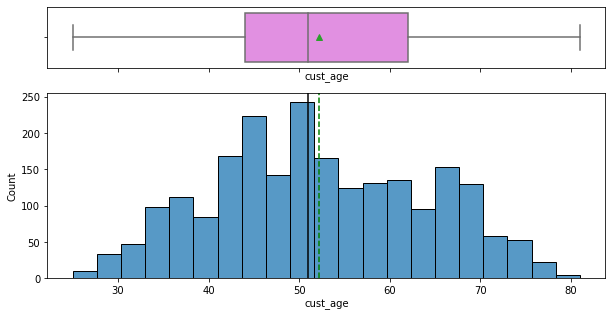

In [35]:
# customer age
histogram_boxplot(df['cust_age'])

- As per the boxplot, there are no outliers in 'Age' variable
- Age has a fairly normal distribution distribution with approx equal mean and median

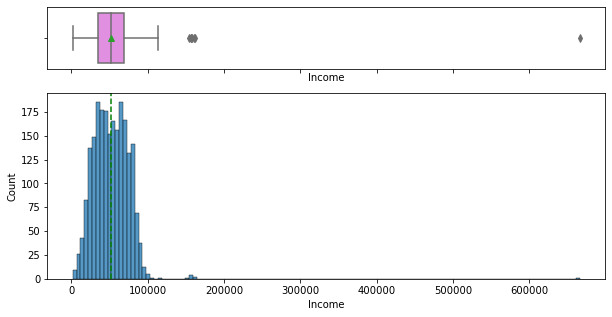

In [36]:
# Income distribution 
histogram_boxplot(df['Income'])

- We can see there are some outliers in the income variable.
- Some variation is always expected in real world scenarios for the income variable but we can remove the data point on extreme right end of the boxplot as it can be a data entry error.

In [37]:
# Dropping observaion with income greater than 20000. There is just 1 such observation
df.drop(index=df[df.Income > 200000].index, inplace=True)

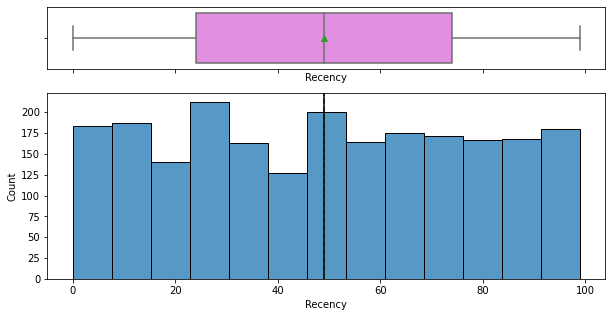

In [38]:
# Recency distribution 
histogram_boxplot(df['Recency'])

- There are no outliers in 'Recency' variable
- The distribution is fairly symmetric and uniformly distributed.

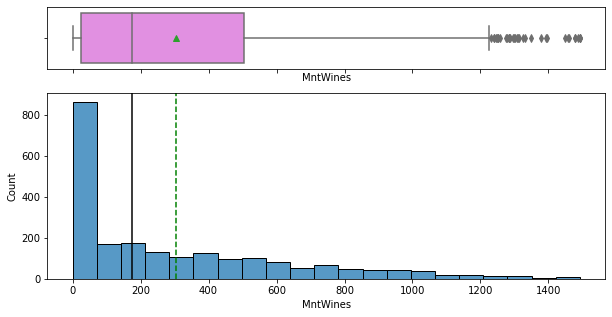

In [39]:
# observations on MntWines
histogram_boxplot(df["MntWines"])

- The distribution for amount spent on wines is highly skewed to the right
- As median of the distribution is less than 200, more than 50% of customers have spent less than 200 on wines.
- There are some outliers on the right end of the boxplot but we will not treat them as some variation is always expected in real world scenarios for variables like amount spent.

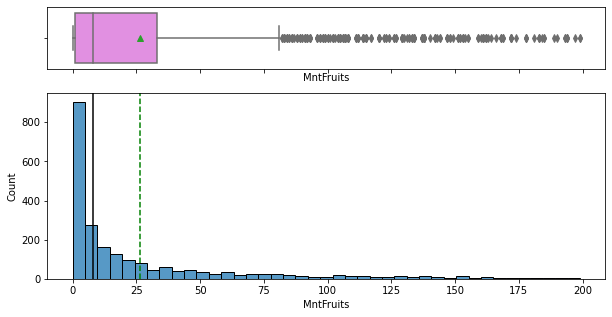

In [40]:
# observations on MntFruits
histogram_boxplot(df["MntFruits"])

- The distribution for amount spent on fruits is highly skewed to the right.
- As median of the distribution is less than 20, more than 50% of customers have spent less than 20 on fruits.
- There are some outliers on the right end of the boxplot but we will not treat them as some variation is always expected in real world scenarios for variables like amount spent.

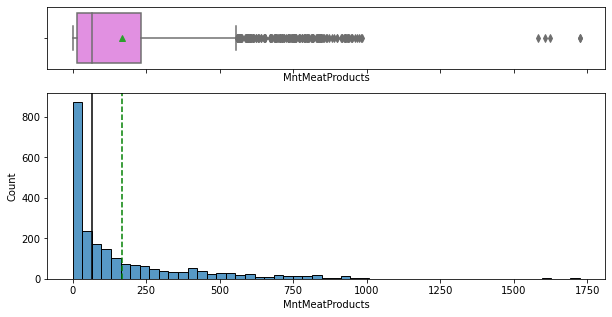

In [41]:
# observations on MntMeatProducts
histogram_boxplot(df["MntMeatProducts"])

- The distribution for amount spent on meat products is highly skewed to the right.
- We can see that there are some extreme observations in the variable which can be considered as outliers as they very far from the rest of the values.
- We can cap the value of the variable to the next highest value.

In [42]:
# Checking 5 largest values of amount spend on meat products
df.MntMeatProducts.nlargest(10)

21      1725
1653    1725
687     1622
2228    1607
164     1582
1358     984
1808     981
456      974
2109     968
1031     961
Name: MntMeatProducts, dtype: int64

In [43]:
# Capping values for amount spent on meat products at next highest value i.e. 984
df["MntMeatProducts"].clip(upper=984, inplace=True)

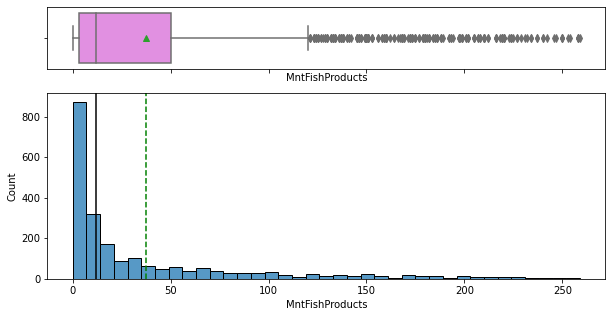

In [44]:
# observations on MntFishProducts
histogram_boxplot(df["MntFishProducts"])

- The distribution for amount spent on fish products is right skewed
- There are some outliers on the right end in the boxplot but we will not treat them as this represents real market trend that some customers spend more on fish products than others.

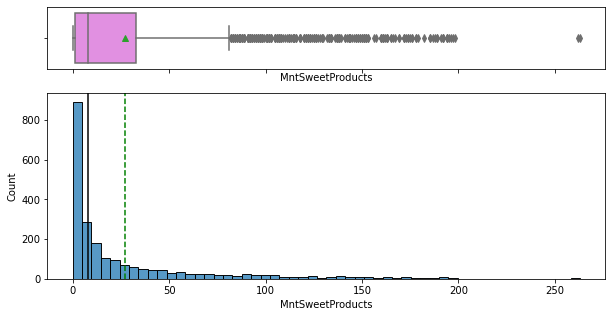

In [45]:
# observations on MntSweetProducts
histogram_boxplot(df["MntSweetProducts"])

- The distribution for the amount spent on sweet products is right skewed
- There is one observation to the right extreme which can be considered as an outlier.
- We will not remove all such data point as they represent real market trend but we can cap some of the extreme values.

In [46]:
df['MntSweetProducts'].nlargest()

27      263
1898    262
634     198
1513    197
1671    196
Name: MntSweetProducts, dtype: int64

In [47]:
# Capping values for amount spent on sweet products at 198
df["MntSweetProducts"].clip(upper=198, inplace=True)

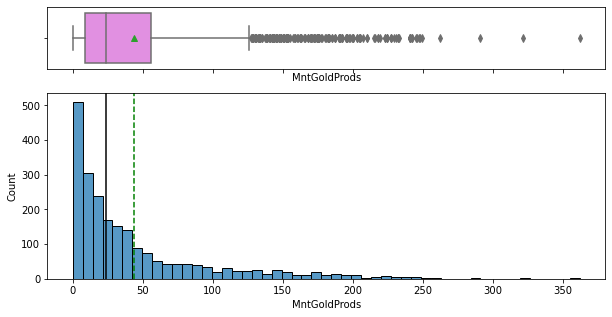

In [48]:
# observations on MntGoldProds
histogram_boxplot(df["MntGoldProds"])

- The distribution for the amount spent on gold products is right skewed
- There are some outliers in amount spent on gold products. We will not remove all such data point as they represent real market trend but we can cap some of the extreme values.

In [49]:
df['MntGoldProds'].nlargest()

27      362
1975    321
1806    291
1328    262
723     249
Name: MntGoldProds, dtype: int64

In [50]:
# Capping values for amount spent on gold products at 250
df["MntGoldProds"].clip(upper=250, inplace=True)

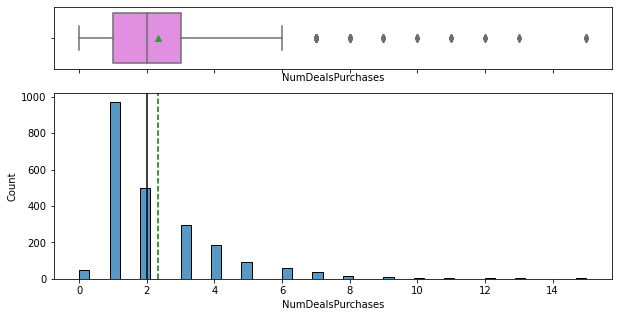

In [51]:
# observations on NumDealsPurchases
histogram_boxplot(df["NumDealsPurchases"])

- Majority of the customers have 2 or less than 2 deal purchases.
- We can see that there some extreme observations in the variable. This represents the real market trend.

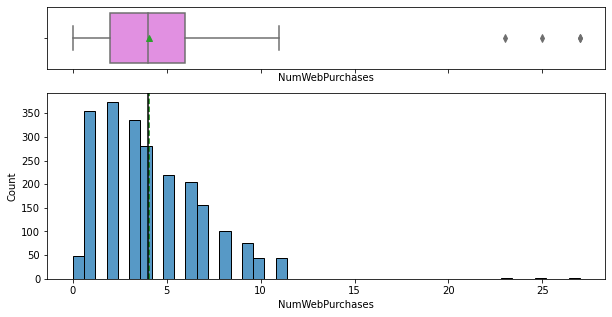

In [52]:
# observations on NumWebPurchases
histogram_boxplot(df["NumWebPurchases"])

- The median of the distribution is 4 i.e. 50% customers have 4 or less than 4 web purchases.
- We can see that there are some extreme observations in the variable. We can cap these values to the next highest number of purchases.

In [53]:
# Capping values for number of web purchases at 11
df["NumWebPurchases"].clip(upper=11, inplace=True)

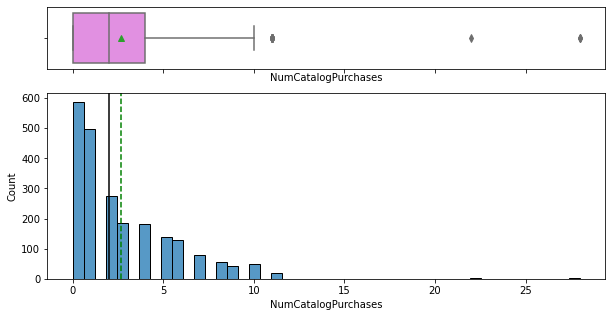

In [54]:
# observations on NumCatalogPurchases
histogram_boxplot(df["NumCatalogPurchases"])

- The most number of observations are for 0 catalog purchases.
- The median of the distribution is 2 i.e. 50% customers have 2 or less than 2 catalog purchases.
- We can see that there are two extreme observation in the variable. We can cap these values to the next highest number of purchases.

In [55]:
# Capping values for number of catalog purchases at 11
df["NumCatalogPurchases"].clip(upper=11, inplace=True)

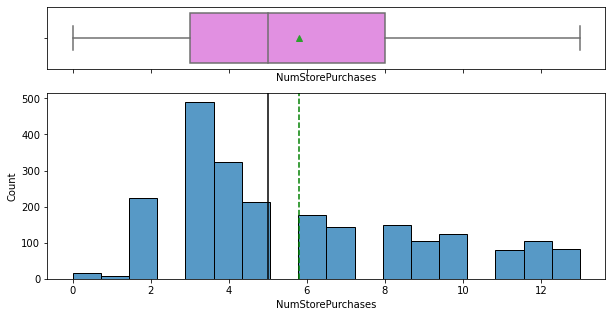

In [56]:
# observations on NumStorePurchases
histogram_boxplot(df["NumStorePurchases"])

- There are very few observations with less than 2 purchases from the store
- Most of the customers have 4 or 5 purchases from the store
- There are no outliers in this variable

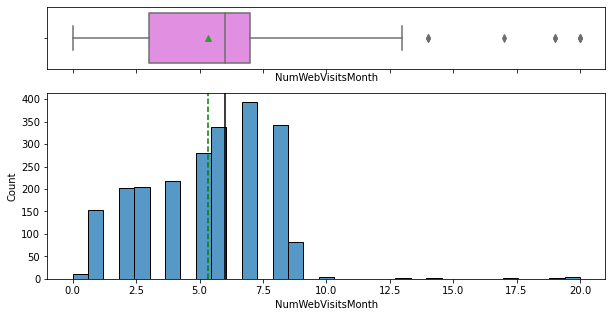

In [57]:
# observations on NumWebVisitsMonth
histogram_boxplot(df["NumWebVisitsMonth"])

- The distribution for number of visits in a month is skewed and have some outliers at the right end.
- We will not treat this as this represents general market trend.

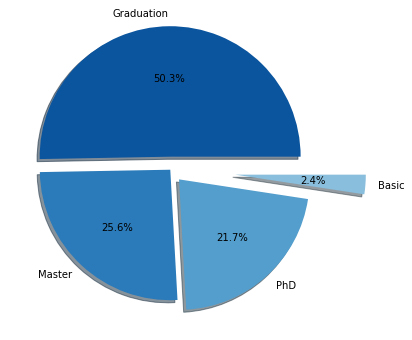

In [58]:
x = df['Education'].value_counts().to_frame('Count')
sns.set_palette('Blues_r')
plt.figure(figsize = (6, 6))
plt.pie(x['Count'], labels = x.index, explode = (0.1, 0, 0.1, 0.5), shadow = True, autopct = '%1.1f%%')
plt.show()

- Education of approx 50% customers is at graduation level.
- Very few observations i.e. ~2% for customers with basic level education.

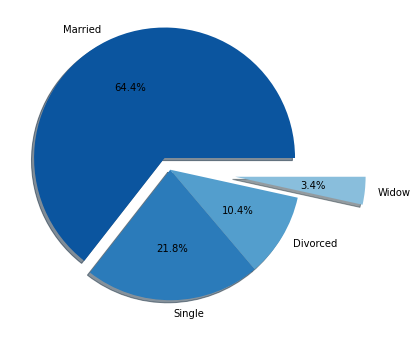

In [59]:
x = df['Marital_Status'].value_counts().to_frame('Count')
sns.set_palette('Blues_r')
plt.figure(figsize = (6, 6))
plt.pie(x['Count'], labels = x.index, explode = (0.1, 0, 0, 0.5), shadow = True, autopct = '%1.1f%%')
plt.show()

- Majority of the customers are married comprising approx 64% of total customers.

- We can observe that the Income has more varation for the higher Income (Positive skewed.) and extreme outlier with grater than 650k. Average Income of the customers is around 50k.

In [60]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature,font_size):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = font_size) # annotate the percantage

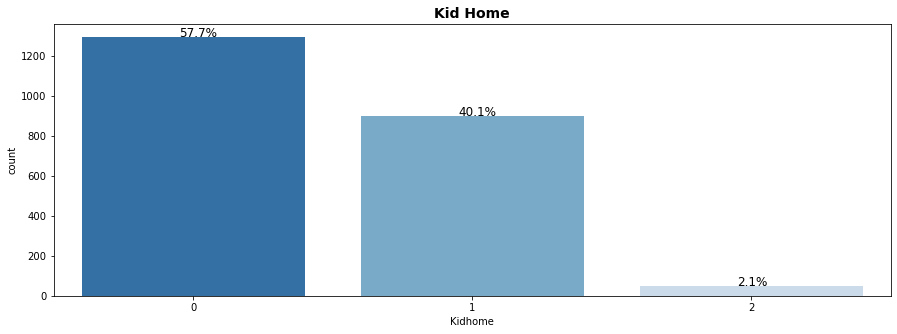

In [61]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Kidhome', data=df, palette='Blues_r');
plt.title("Kid Home", weight='bold').set_fontsize('14')
bar_perc(ax,df['Kidhome'],font_size=12)

- 40% customers have 1 kid and 58% customers have no kids at home
- There are very few customers, approx 2%, with number of kids greater than 1.

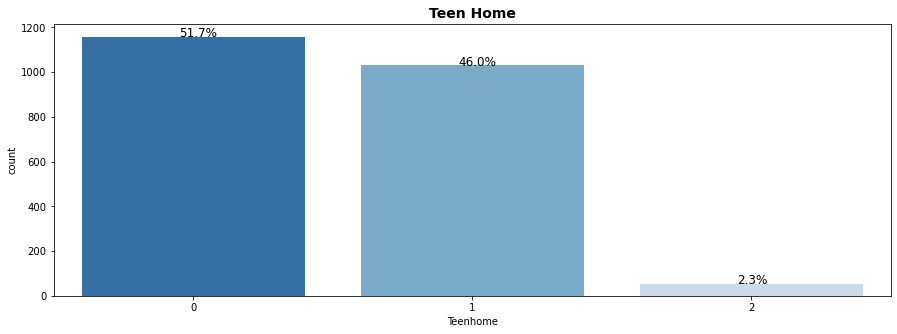

In [62]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Teenhome', data=df, palette='Blues_r');
plt.title("Teen Home", weight='bold').set_fontsize('14')
bar_perc(ax,df['Teenhome'],font_size=12)

- We can observe that  proportion of one teen staying at home and teen not staying at home are close by.

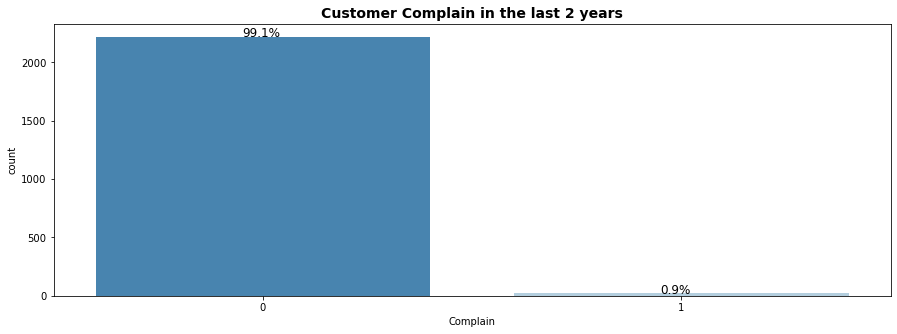

In [63]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Complain', data=df, palette='Blues_r');
plt.title("Customer Complain in the last 2 years", weight='bold').set_fontsize('14')
bar_perc(ax,df['Complain'],font_size=12)

- Approx 99% customers had no complaint in the last 2 years. This shows that the company provides good services.

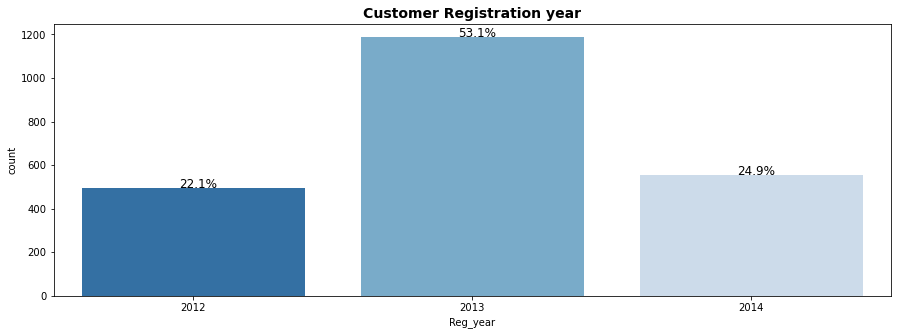

In [64]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Reg_year', data=df, palette='Blues_r');
plt.title("Customer Registration year", weight='bold').set_fontsize('14')
bar_perc(ax,df['Reg_year'],font_size=12)

- The number of customers registered are highest in the year 2013. This is because we have only half year data for 2012 and 2014.

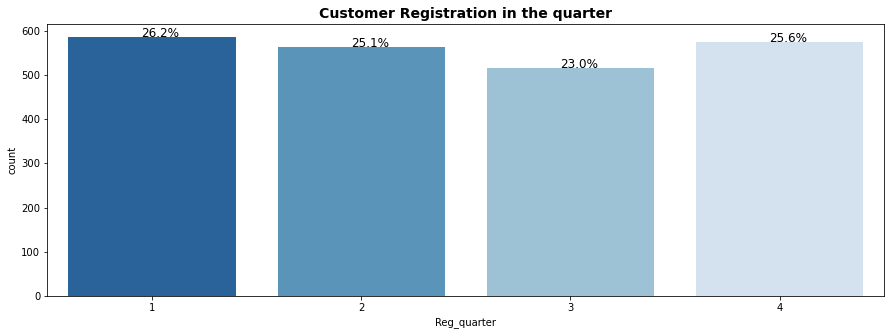

In [65]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Reg_quarter', data=df, palette='Blues_r');
plt.title("Customer Registration in the quarter", weight='bold').set_fontsize('14')
bar_perc(ax,df['Reg_quarter'],font_size=12)

- There is no significant difference in the number of registrations for each quarter.
- The number of registrations are slightly higher for 1st and the 4th quarter. This can be due to the festival season in these months.
- Let's explore this further by plotting count of registration per month.

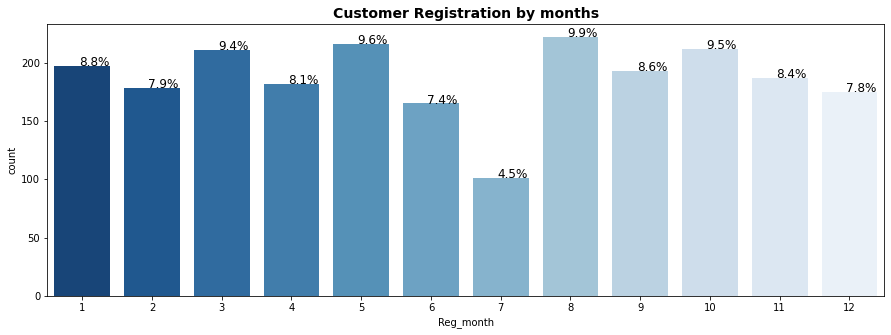

In [66]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Reg_month', data=df, palette='Blues_r');
plt.title("Customer Registration by months", weight='bold').set_fontsize('14')
bar_perc(ax,df['Reg_month'],font_size=12)

- This shows that the highest number of registration are in the months of winters i.e. March, May, August, October.
- There is approx 3% reduction in the number of registrations from the month June to the month of July.

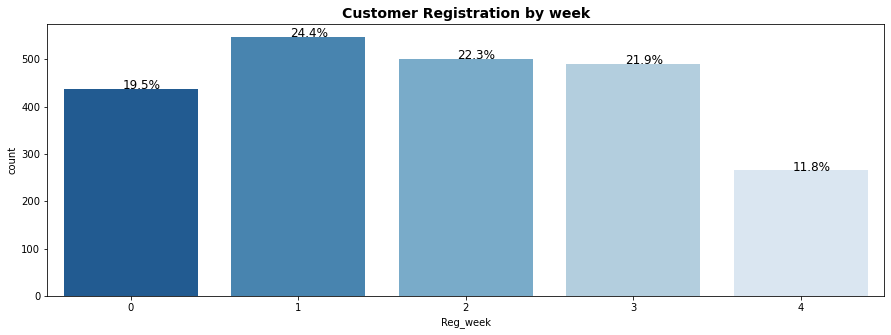

In [67]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Reg_week', data=df, palette='Blues_r');
plt.title("Customer Registration by week", weight='bold').set_fontsize('14')
bar_perc(ax,df['Reg_week'],font_size=12)

- This shows that number of registrations decline at the end of the month i.e. in last two weeks.
- This can be due to the fact that most people get salaries on the last day or first day of the month.

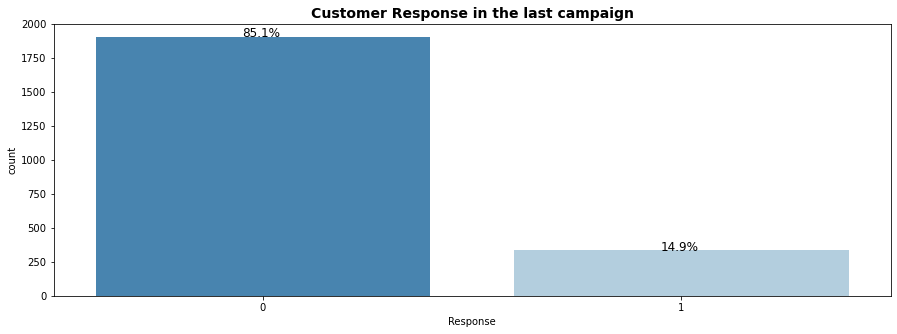

In [68]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Response', data=df, palette='Blues_r');
plt.title("Customer Response in the last campaign", weight='bold').set_fontsize('14')
bar_perc(ax,df['Response'],font_size=12)

- Approx 85% customer's response was NO in the last campaign.
- This shows that the distribution of classes in the target variable is imbalanced. We have only ~15% observations where response is YES.

## Bivariate Analysis.
- Understanding how two variables and multiple variables datas are spread across to find patterns.Understanding how single variable observation is spread across to find patterns.

In [69]:
sns.pairplot(df, hue="Response");

- There are overlaps i.e. no clear distinction in the distribution of variables for people who have taken the product and did not take the product.
- Let's explore this further with the help of other plots.

In [70]:
# function to create box plot. Target variable vs numerical

def box_plt(feature, variable):
    plt.figure(figsize=(10,5)) 
    
    sns.boxplot(feature, x='Label',y=variable, data=df,palette='coolwarm',showmeans=True,
           meanprops={"marker":"^", "markerfacecolor":"white", "markeredgecolor":"black", "markersize":"8"});

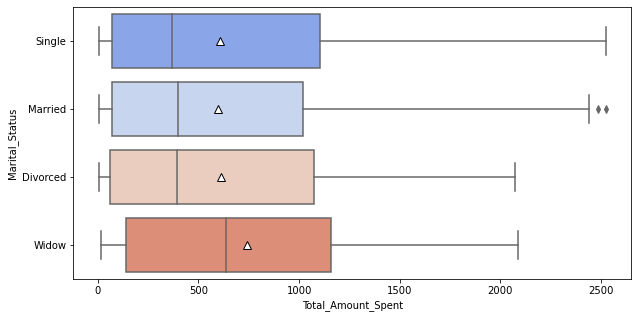

In [71]:
box_plt(df["Total_Amount_Spent"], df['Marital_Status'])

- We can see that total amount spent is higher for widowed customers.
- No significant difference in the amount spent by single, married or divorced customers.

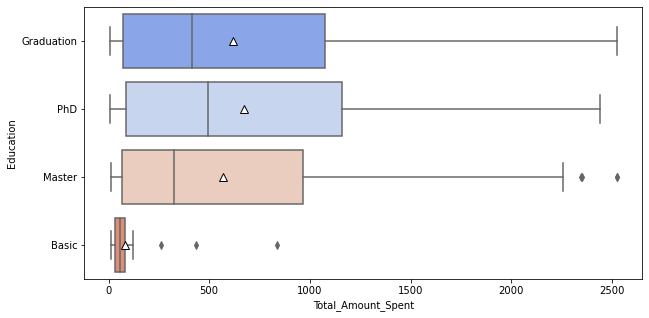

In [72]:
box_plt(df["Total_Amount_Spent"], df['Education'])

- As expected, the amount spent increases with the increase in education level.
- Customers with graduation level education spend slightly more than the customers with master level education.

<AxesSubplot:xlabel='Reg_year,Reg_month'>

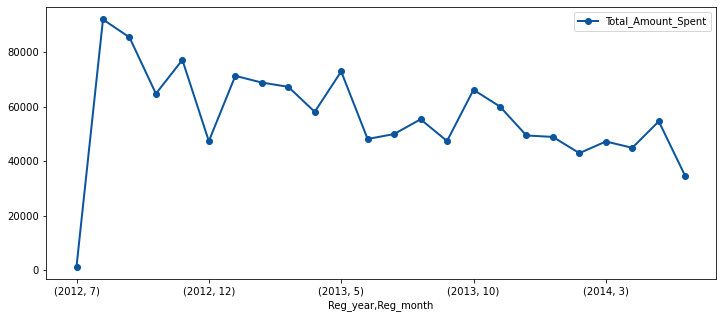

In [73]:
pd.pivot_table(data=df, index=["Reg_year", "Reg_month"], values="Total_Amount_Spent", aggfunc=np.sum)\
.plot(kind="line", marker="o", linewidth=2, figsize=(12,5))

- The plot clearly shows that the total amount spent has declined over the years.
- The plot shows highest increase in the amount spent from the month of August to September 2012.

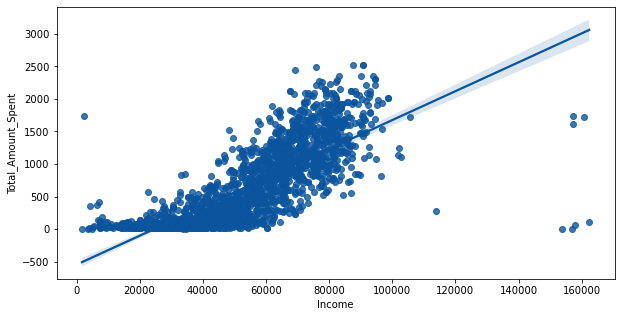

In [74]:
plt.figure(figsize=(10,5)) 
sns.regplot(y=df.Total_Amount_Spent, x=df.Income);

- We can see that income and the total amount spent have a positive correlation.
- The total amount spent is not much different for customers with income in the range of 20K to 60K but the difference is significant for customers in the range of 60K to 100K.

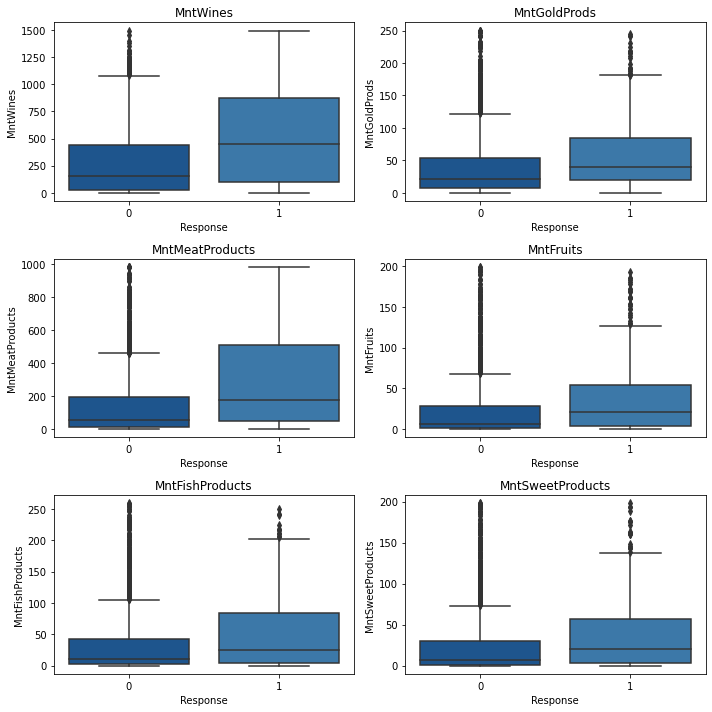

In [75]:
cols = df[
    [
        "MntWines",
        "MntGoldProds",
        "MntMeatProducts",
        "MntFruits",
        "MntFishProducts",
        "MntSweetProducts",
    ]
].columns.tolist()
plt.figure(figsize=(10, 10))

for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(df["Response"], df[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Each plot shows that customer spending more on any product is more likely to take the offer. 

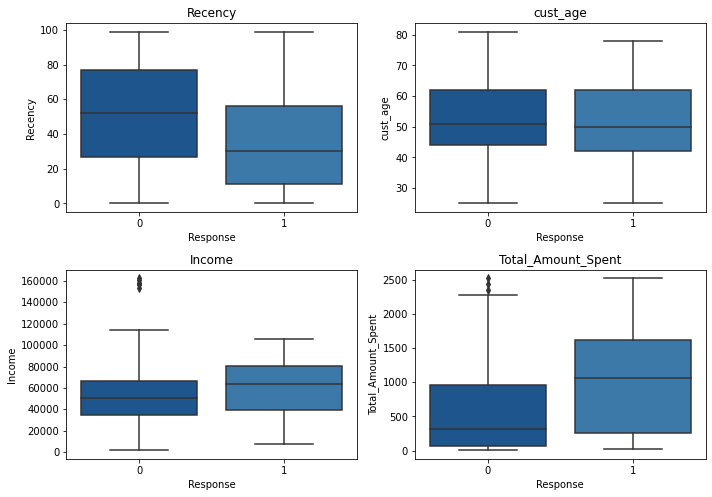

In [76]:
cols = df[["Recency", "cust_age", "Income", "Total_Amount_Spent"]].columns.tolist()
plt.figure(figsize=(10, 10))
for i, variable in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(df["Response"], df[variable])
    plt.tight_layout()
    plt.title(variable)
plt.show()

- Customers with lower recency i.e. less number of days since the last purchase, are more likely to take the offer.
- Response does not depends much on the customer age.
- Customers with higher income are more likely to take the offer.
- Customers who spent more in the last 2 years are more likely to take the offer.

In [77]:
# Lets create a function for stacked bar charts to compare the Target variable agains the other independent variable.
colors = ["#0B5394", "#6FA8DC"] # color of the bars

def stacked_bar(feature):
    
    tab=pd.crosstab(feature,df["Response"],margins=True)
    print(tab)
    print('-'*120)
    
    tab1=pd.crosstab(feature,df["Response"],normalize='index')
    tab1.plot(kind='bar',stacked=True,figsize=(10,5),edgecolor='white',color=colors)
    plt.legend(loc='upper left',bbox_to_anchor=(1,1),edgecolor='white')
    plt.xticks(rotation=90);

Response       0    1   All
Education                  
Basic         52    2    54
Graduation   974  152  1126
Master       494   79   573
PhD          385  101   486
All         1905  334  2239
------------------------------------------------------------------------------------------------------------------------


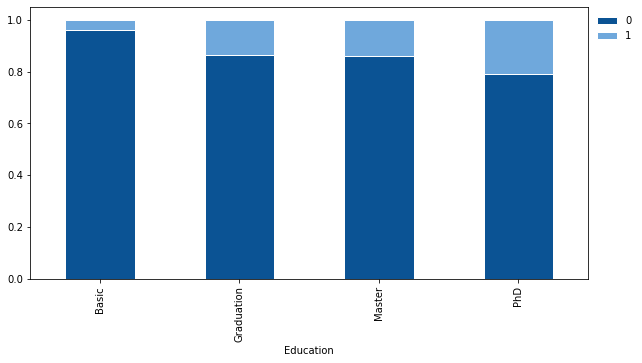

In [78]:
stacked_bar(df["Education"])

- We can see a clear trend here that customers with higher education are more likely to take the offer. 

Response           0    1   All
Marital_Status                 
Divorced         184   48   232
Married         1285  158  1443
Single           378  109   487
Widow             58   19    77
All             1905  334  2239
------------------------------------------------------------------------------------------------------------------------


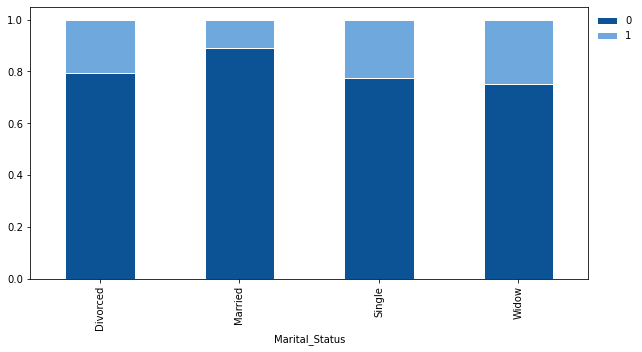

In [79]:
stacked_bar(df["Marital_Status"])

- We saw earlier that number of married customers are much more than single or divorced but divorced/widow customers are more likely to take the offer.
- Single customers are more likely to take the offer than married customers.

Response     0    1   All
Kidhome                  
0         1071  222  1293
1          788  110   898
2           46    2    48
All       1905  334  2239
------------------------------------------------------------------------------------------------------------------------


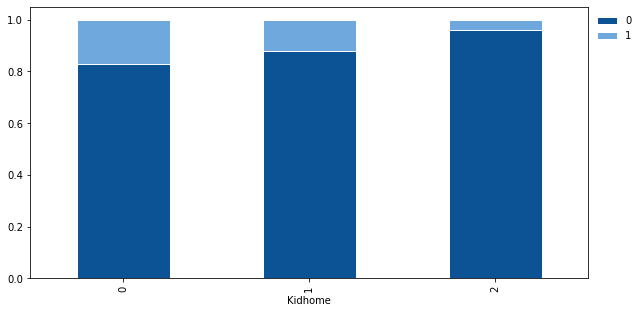

In [80]:
stacked_bar(df["Kidhome"])

- We can see that as number of kids increases, chances of customers taking the offer decreases.
- Customers with no kids at home are more likely to take the offer which can be expected as this includes single customers as well.

Response     0    1   All
Teenhome                 
0          920  237  1157
1          938   92  1030
2           47    5    52
All       1905  334  2239
------------------------------------------------------------------------------------------------------------------------


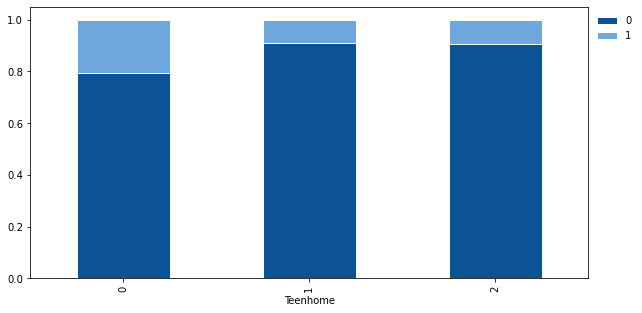

In [81]:
stacked_bar(df["Teenhome"])

- Customers with no teens at home are most likely to take the offer.
- Customers with two teens are more likely to take the offer than customers with 1 teenager.

Response     0    1   All
Reg_year                 
2012       362  132   494
2013      1034  154  1188
2014       509   48   557
All       1905  334  2239
------------------------------------------------------------------------------------------------------------------------


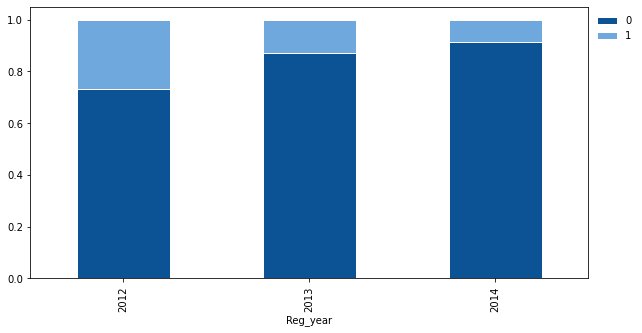

In [82]:
stacked_bar(df["Reg_year"])

- Number of customers taking the offer is decreasing each subsequent year.
- Let's explore this further for month wise distribution for each of the year.

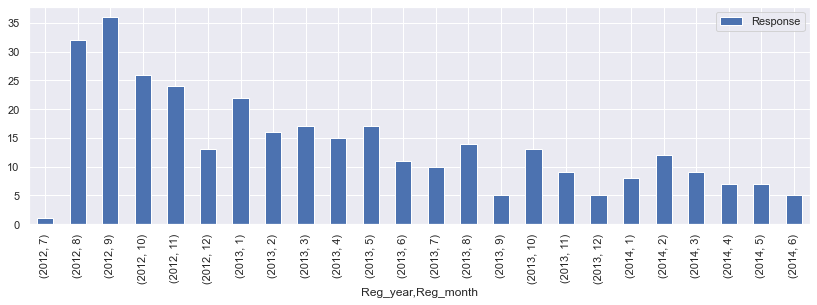

In [83]:
sns.set(rc={"figure.figsize": (15, 7)})
pd.pivot_table(
    data=df, index=["Reg_year", "Reg_month"], values="Response", aggfunc=np.sum
).plot(kind="bar", figsize=(14,4));

- Sales for each month is less than the corresponding month of the previous year.
- We can observe that sales are high at the beginning of the year but decreases as each month passes.
- Sales are high for the 8th and 9th month of the year 2012. This might be because offer gained popularity in beginning and customers lost interest in the offer with time.
- This shows that the company should upgrade the offer and focus more on the marketing strategy.

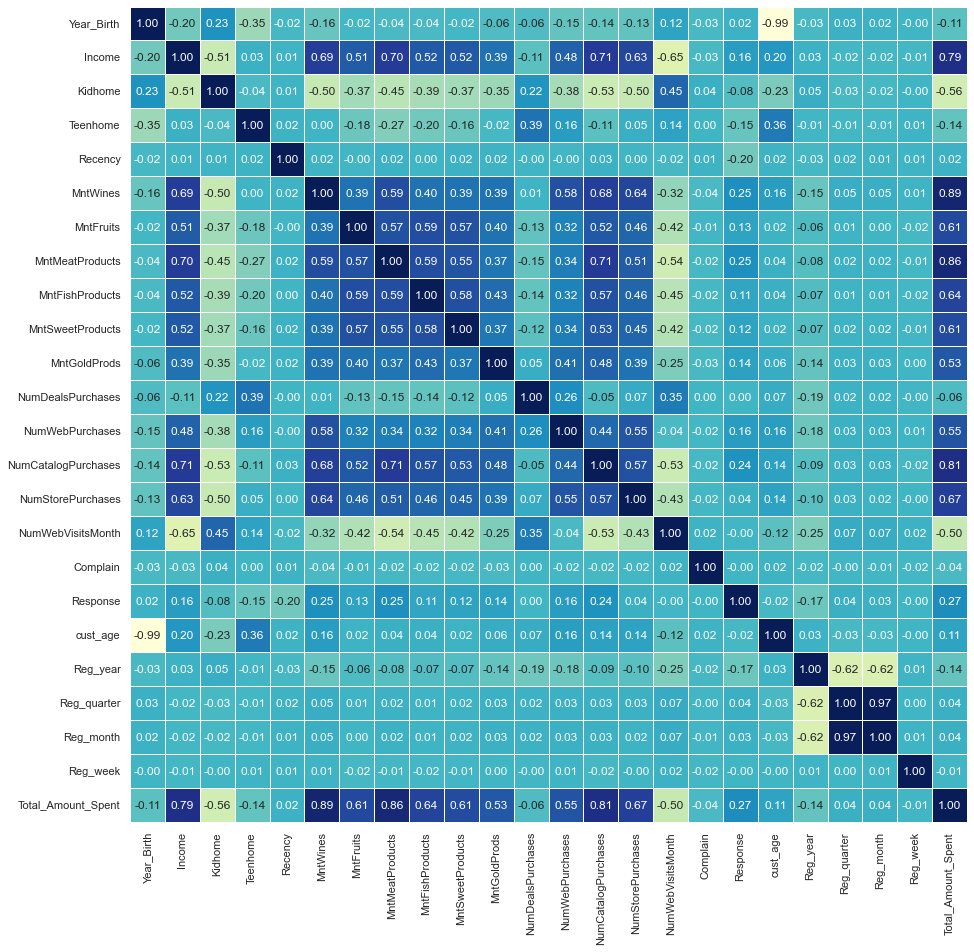

In [84]:
sns.set(rc={"figure.figsize": (15, 15)})
sns.heatmap(df.corr(), annot=True, linewidths=0.5, center=0, cbar=False, cmap="YlGnBu",fmt="0.2f")
plt.show()

- As expected, age and year birth have high negative correlation. We can drop one of them.
- Registration month and quarter and year columns are highly correlated which can be expected as we extracted these columns from the same column.
- We can drop one of the columns in quarter or month as they are almost perfectly correlated.
- Total number of purchases and total amount spent are correlated with variables they are associate with. We can drop these columns
- Number of purchases is positively correlated with income which can be expected as customers with higher income might spend more than customers with lower income.

## Missing Value Treatment

In [85]:
# create a copy of the file.
miss_df = df.copy()

In [86]:
miss_df.head()

Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0        1957  Graduation         Single  58138.0        0         0   
1        1954  Graduation         Single  46344.0        1         1   
2        1965  Graduation        Married  71613.0        0         0   
3        1984  Graduation        Married  26646.0        1         0   
4        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Complain  \
0                   10                  4                  7         0   
1                    1                  2                  5         0   
2                    2                 10                  4         0   
3                    0                  4                  6         0   
4                    3                  6                  5         0   

   Response  cust_age  Reg_year  Reg_quarter  Reg_month  Reg_week  \
0         1        64      2012            3          9         0   
1         0        67      2014            1          3         1   
2         0        56      2013            3          8         3   
3         0        37      2014            1          2         1   
4         0        40      2014            1          1         2   

   Total_Amount_Spent  
0                1617  
1                  27  
2                 776  
3                  53  
4                 422

In [87]:
miss_df.columns[miss_df.isnull().any()].tolist() 

['Income']

In [88]:
# drop all the rows which contains missing values
miss_df=miss_df.dropna(how='any',axis=0)

In [89]:
# drop those columns which we dont need for model building
miss_df.drop(["Year_Birth", "Dt_Customer", "Reg_quarter", "Total_Amount_Spent"], axis=1, inplace=True)

In [90]:
#There are 2 option available:
#either map character variable to number as below or create dummy variable.

# create dummy variables for character variable.
#miss_df=pd.get_dummies(miss_df,columns=["Education","Marital_Status"],drop_first=True)

education = {'Basic':1, 'Graduation':2, 'Master':3, 'PhD':4}
miss_df['Education']=miss_df['Education'].map(education).astype('Int32')
marital_status = {'Married':1,'Single':2, 'Divorced':3, 'Widow':4}
miss_df['Marital_Status']=miss_df['Marital_Status'].map(marital_status).astype('Int32')

In [91]:
miss_df.head()

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  MntWines  \
0          2               2  58138.0        0         0       58       635   
1          2               2  46344.0        1         1       38        11   
2          2               1  71613.0        0         0       26       426   
3          2               1  26646.0        1         0       26        11   
4          4               1  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  Complain  Response  cust_age  \
0                  4                  7         0         1        64   
1                  2                  5         0         0        67   
2                 10                  4         0         0        56   
3                  4                  6         0         0        37   
4                  6                  5         0         0        40   

   Reg_year  Reg_month  Reg_week  
0      2012          9         0  
1      2014          3         1  
2      2013          8         3  
3      2014          2         1  
4      2014          1         2

In [92]:
#Create A and b variables
A = miss_df.drop(['Response'],axis=1)
b = miss_df['Response']

In [93]:
#split the data to 70:30
A_train, A_test, b_train, b_test = train_test_split(A,b, test_size=0.30, random_state=42)

In [94]:
# get the KNN classifier library
from sklearn.neighbors import KNeighborsClassifier

In [95]:
# create a loop to get the best K value.

error_rate = []
for i in range(1,25):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(A_train,b_train)
    pred_i = knn.predict(A_test)
    error_rate.append(np.mean(pred_i != b_test))

Text(0, 0.5, 'Error Rate')

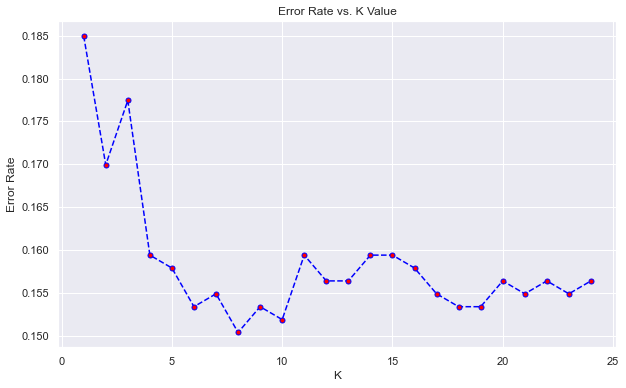

In [96]:
# plot the error rate and k value.

plt.figure(figsize=(10,6))
plt.plot(range(1,25),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=5)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

- From the above we can confirm that the lowest error rate is after k=18.

In [97]:
#import KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,25)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(A_train, b_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(A_train, b_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(A_test, b_test) 

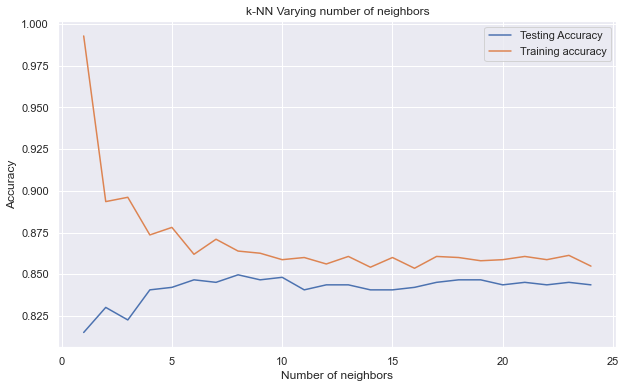

In [98]:
#Generate plot

plt.figure(figsize=(10,6))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

- From the above we can observe that Accuracy for test is highest for K=18.

In [99]:
# create another data frame and also tranform chacter variables to dummy variables.
# this will be used to impute the missing values.
df1 = pd.get_dummies(df,columns=["Education","Marital_Status"],drop_first=True)

In [100]:
# drop those variables which we dont need it for model building process.
df1.drop(["Year_Birth", "Dt_Customer", "Reg_quarter", "Total_Amount_Spent"], axis=1, inplace=True)

In [101]:
# copy the column names for below steps
df1.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'cust_age', 'Reg_year', 'Reg_month', 'Reg_week',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Widow'],
      dtype='object')

In [102]:
# KNN imputation process, also creating data frame.

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=18, weights="uniform")
temp_df_for_imputation = df1[['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'cust_age', 'Reg_year', 'Reg_month', 'Reg_week',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Widow']]
temp_df_for_imputation = imputer.fit_transform(temp_df_for_imputation)
temp_df_for_imputation = pd.DataFrame(
    temp_df_for_imputation,
    columns=['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Complain', 'Response', 'cust_age', 'Reg_year', 'Reg_month', 'Reg_week',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Widow'])

In [103]:
# create a copy of imputation data frame after replacing missing values. 
df2 = temp_df_for_imputation.copy()

In [104]:
df2.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0      0.0       0.0     58.0     635.0       88.0            546.0   
1  46344.0      1.0       1.0     38.0      11.0        1.0              6.0   
2  71613.0      0.0       0.0     26.0     426.0       49.0            127.0   
3  26646.0      1.0       0.0     26.0      11.0        4.0             20.0   
4  58293.0      1.0       0.0     94.0     173.0       43.0            118.0   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0            172.0              88.0          88.0                3.0   
1              2.0               1.0           6.0                2.0   
2            111.0              21.0          42.0                1.0   
3             10.0               3.0           5.0                2.0   
4             46.0              27.0          15.0                5.0   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0              8.0                 10.0                4.0                7.0   
1              1.0                  1.0                2.0                5.0   
2              8.0                  2.0               10.0                4.0   
3              2.0                  0.0                4.0                6.0   
4              5.0                  3.0                6.0                5.0   

   Complain  Response  cust_age  Reg_year  Reg_month  Reg_week  \
0       0.0       1.0      64.0    2012.0        9.0       0.0   
1       0.0       0.0      67.0    2014.0        3.0       1.0   
2       0.0       0.0      56.0    2013.0        8.0       3.0   
3       0.0       0.0      37.0    2014.0        2.0       1.0   
4       0.0       0.0      40.0    2014.0        1.0       2.0   

   Education_Graduation  Education_Master  Education_PhD  \
0                   1.0               0.0            0.0   
1                   1.0               0.0            0.0   
2                   1.0               0.0            0.0   
3                   1.0               0.0            0.0   
4                   0.0               0.0            1.0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Widow  
0                     0.0                    1.0                   0.0  
1                     0.0                    1.0                   0.0  
2                     1.0                    0.0                   0.0  
3                     1.0                    0.0                   0.0  
4                     1.0                    0.0                   0.0

In [105]:
df2.columns[df2.isnull().any()].tolist() 

[]

- No missing values.

In [106]:
df2.shape

(2239, 27)


# Evaluation Metrics:

#### Model can make wrong predictions as:
1. Predicting a customer will buy the product and the customer doesn't buy - High Operational cost, time and resource.
2. Predicting a customer will not buy the product and the customer buys - Loss of opportunity, not targeting the right customer.

#### Which case is more important?
- Predicting that customer will not buy the product but he buys i.e. losing on a potential source of income for the company because that customer will not targeted by the marketing team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
- Company wants Recall to be maximized, greater the Recall lesser the chances of false negatives.

#### Let's start by building different models using KFold and cross_val_score with pipelines and tune the best model using GridSearchCV and RandomizedSearchCV.
- Stratified K-Folds cross-validator provides dataset indices to split data in train/validation sets. Split dataset into k consecutive folds (without shuffling by default) keeping distribution of both classes in each fold same as the target variable. Each fold is then used once as a validation while the k - 1 remaining folds form the training set.

# Model Building

In [107]:
# Defining X and Y variables

X = df2.drop(['Response'],axis=1)
y = df2['Response']

In [108]:
# Splitting data into training and test set:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape, X_test.shape)

(1567, 26) (672, 26)


In [109]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision

def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)
    
    train_f1 = metrics.f1_score(y_train, pred_train)
    test_f1 = metrics.f1_score(y_test, pred_test)

    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision, train_f1, test_f1))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print("Precision on training set : ", metrics.precision_score(y_train, pred_train))
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))
        print("f1 on training set : ", metrics.f1_score(y_train, pred_train))
        print("f1 on test set : ", metrics.f1_score(y_test, pred_test))


    return score_list  # returning the list with train and test scores

In [158]:
## Function to create confusion matrix

def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    data_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(8, 5))
    sns.heatmap(data_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")  
    
def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    data_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(8, 5))
    sns.heatmap(data_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Base Models Performance

In [111]:
models = []  # Empty list to store all the models

# Appending pipelines for each model into the list

models.append(
    (
        "GNB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gnb", GaussianNB()),
            ]
        ),
    )
)


models.append(
    (
        "SGD",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("sgd", SGDClassifier(random_state=42,  class_weight='balanced')),
            ]
        ),
    )
)

models.append(
    (
        "SVM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("svm", svm.SVC(random_state=42,  class_weight='balanced', probability=True)),
            ]
        ),
    )
)

models.append(
    (
        "Ridge",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("ridge", RidgeClassifier(random_state=42, max_iter=1000, class_weight='balanced')),
            ]
        ),
    )
)

models.append(
    (
        "LGBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("lgbm", LGBMClassifier(random_state=42,  class_weight='balanced')),
            ]
        ),
    )
)

models.append(
    (
        "XTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xtree", ExtraTreesClassifier(random_state=42,  class_weight='balanced', bootstrap=True)),
            ]
        ),
    )
)

models.append(
    (
        "CATB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("catb", CatBoostClassifier(random_state=42,  verbose=False)),
            ]
        ),
    )
)

models.append(
    (
        "KNN",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("knn", KNeighborsClassifier()),
            ]
        ),
    )
)

models.append(
    (
        "LG",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("lg", LogisticRegression(random_state=42, class_weight='balanced')),
            ]
        ),
    )
)


models.append(
    (
        "DTREE",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("decision_tree", DecisionTreeClassifier(random_state=42, class_weight='balanced')),
            ]
        ),
    )
)


models.append(
    (
        "Bagging",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("bg", BaggingClassifier(random_state=42)),
            ]
        ),
    )
)


models.append(
    (
        "RF",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("random_forest", RandomForestClassifier(random_state=42, class_weight='balanced')),
            ]
        ),
    )
)

models.append(
    (
        "ADB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("adaboost", AdaBoostClassifier(random_state=42)),
            ]
        ),
    )
)


models.append(
    (
        "GBM",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("gradient_boosting", GradientBoostingClassifier(random_state=42)),
            ]
        ),
    )
)


models.append(
    (
        "XGB",
        Pipeline(
            steps=[
                ("scaler", StandardScaler()),
                ("xgboost", XGBClassifier(random_state=42, eval_metric='logloss')),
            ]
        ),
    )
)

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# loop through all models to get the mean cross validated score
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=42
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

GNB: 52.99722479185939
SGD: 62.849213691026826
SVM: 64.58834412580943
Ridge: 73.96854764107307
LGBM: 48.26086956521739
XTREE: 15.78168362627197
CATB: 30.777058279370955
KNN: 13.66327474560592
LG: 73.96854764107307
DTREE: 36.743755781683625
Bagging: 29.102682701202585
RF: 14.939870490286772
ADB: 35.504162812210915
GBM: 35.05087881591119
XGB: 40.59204440333025


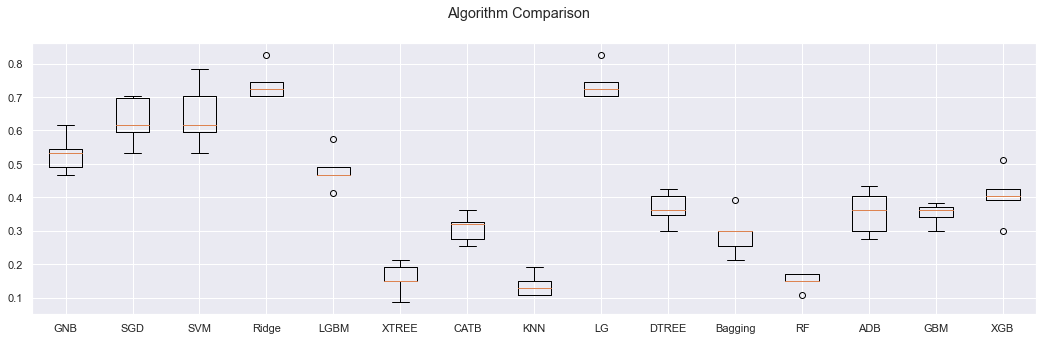

In [112]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(18, 5))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

- From the above we can observe that Linear based models are producing good model score.

### Logistic Regression - Stats Model.

In [113]:
## Defining a function for better visualization of confusion matrix

from sklearn.metrics import classification_report,confusion_matrix
#mat_train = confusion_matrix(y_train,pred_train)

def make_confusion_matrix(y_actual,y_predict,labels=[1, 0]):
    '''
    y_predict: prediction of class
    y_actual : ground truth  
    '''
    cm=confusion_matrix( y_predict,y_actual, labels=[1, 0])
    df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ['1','0']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (7,5))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [114]:
# view the data
df2.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0      0.0       0.0     58.0     635.0       88.0            546.0   
1  46344.0      1.0       1.0     38.0      11.0        1.0              6.0   
2  71613.0      0.0       0.0     26.0     426.0       49.0            127.0   
3  26646.0      1.0       0.0     26.0      11.0        4.0             20.0   
4  58293.0      1.0       0.0     94.0     173.0       43.0            118.0   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0            172.0              88.0          88.0                3.0   
1              2.0               1.0           6.0                2.0   
2            111.0              21.0          42.0                1.0   
3             10.0               3.0           5.0                2.0   
4             46.0              27.0          15.0                5.0   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0              8.0                 10.0                4.0                7.0   
1              1.0                  1.0                2.0                5.0   
2              8.0                  2.0               10.0                4.0   
3              2.0                  0.0                4.0                6.0   
4              5.0                  3.0                6.0                5.0   

   Complain  Response  cust_age  Reg_year  Reg_month  Reg_week  \
0       0.0       1.0      64.0    2012.0        9.0       0.0   
1       0.0       0.0      67.0    2014.0        3.0       1.0   
2       0.0       0.0      56.0    2013.0        8.0       3.0   
3       0.0       0.0      37.0    2014.0        2.0       1.0   
4       0.0       0.0      40.0    2014.0        1.0       2.0   

   Education_Graduation  Education_Master  Education_PhD  \
0                   1.0               0.0            0.0   
1                   1.0               0.0            0.0   
2                   1.0               0.0            0.0   
3                   1.0               0.0            0.0   
4                   0.0               0.0            1.0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Widow  
0                     0.0                    1.0                   0.0  
1                     0.0                    1.0                   0.0  
2                     1.0                    0.0                   0.0  
3                     1.0                    0.0                   0.0  
4                     1.0                    0.0                   0.0

In [115]:
# Scale the data.
scaled_df=df2.copy()
scaler=MinMaxScaler()
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df),columns=scaled_df.columns)
scaled_df.head(3)

Income  Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0  0.351086      0.0       0.0  0.585859  0.425318   0.442211   
1  0.277680      0.5       0.5  0.383838  0.007368   0.005025   
2  0.434956      0.0       0.0  0.262626  0.285332   0.246231   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0         0.554878         0.664093          0.444444         0.352   
1         0.006098         0.007722          0.005051         0.024   
2         0.129065         0.428571          0.106061         0.168   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0           0.200000         0.727273             0.909091           0.307692   
1           0.133333         0.090909             0.090909           0.153846   
2           0.066667         0.727273             0.181818           0.769231   

   NumWebVisitsMonth  Complain  Response  cust_age  Reg_year  Reg_month  \
0               0.35       0.0       1.0  0.696429       0.0   0.727273   
1               0.25       0.0       0.0  0.750000       1.0   0.181818   
2               0.20       0.0       0.0  0.553571       0.5   0.636364   

   Reg_week  Education_Graduation  Education_Master  Education_PhD  \
0      0.00                   1.0               0.0            0.0   
1      0.25                   1.0               0.0            0.0   
2      0.75                   1.0               0.0            0.0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Widow  
0                     0.0                    1.0                   0.0  
1                     0.0                    1.0                   0.0  
2                     1.0                    0.0                   0.0

In [116]:
# Define X and y variables

X = scaled_df.drop(['Response'],axis=1)
y = scaled_df['Response']

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

- Before making the model, first let's check if our variables have multicollinearity.
- Why Multicollinearity: It is a common problem when estimating linear or generalized linear models. It occurs when there are high correlations among predictor variables, leading to unreliable and unstable estimates of regression coefficients.
- There are different ways of detecting(or testing) multi-collinearity, one such way is Variation Inflation Factor.
- Variance Inflation factor: Variance inflation factors measure the inflation in the variances of the regression coefficients estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient k is inflated by the existence of correlation among the predictor variables in the model.
- General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and hence the variance of k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use.

In [117]:
# dataframe with numerical column only
num_feature_set = X.copy()
from statsmodels.tools.tools import add_constant
num_feature_set = add_constant(num_feature_set)

In [118]:
# produce VIF table.
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                     118.879069
Income                      4.295966
Kidhome                     1.879453
Teenhome                    1.668921
Recency                     1.008327
MntWines                    3.074780
MntFruits                   1.965638
MntMeatProducts             3.083246
MntFishProducts             2.138211
MntSweetProducts            1.932636
MntGoldProds                1.525457
NumDealsPurchases           1.627200
NumWebPurchases             2.210725
NumCatalogPurchases         3.200650
NumStorePurchases           2.380738
NumWebVisitsMonth           2.976778
Complain                    1.010055
cust_age                    1.295493
Reg_year                    2.079444
Reg_month                   1.719545
Reg_week                    1.007046
Education_Graduation       11.800549
Education_Master            9.360532
Education_PhD               8.774433
Marital_Status_Married      2.589497
Marital_Status_Single       2.483468
Mar

- Education classes are highly correlated, either we have to keep them in the model or drop all the Education classes from the model.

In [119]:
# split the data again with numerical feature set.
X_train, X_test, y_train, y_test = train_test_split(num_feature_set, y, test_size=0.30)

In [120]:
# produce the stats model
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train)
lg = logit.fit()

print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.287254
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1540
Method:                           MLE   Df Model:                           26
Date:                Wed, 17 Nov 2021   Pseudo R-squ.:                  0.3291
Time:                        10:48:37   Log-Likelihood:                -450.13
converged:                       True   LL-Null:                       -670.91
Covariance Type:            nonrobust   LLR p-value:                 3.859e-77
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.6721      1.271     -2.102      0.036      -5.164      

- We can observe that the p-value of Income, Teenhome, MntFruits, MntFishProducts, MntSweetProducts,NumDealsPurchases, Complain, Cust_age, Reg_Week, All Education Classes, and Marital Status classes have p-value greater than 0.05, they seem to be insignificant.
- Let's Drop them one by one and observe how our model changes.

In [136]:
X_train1 = X_train.drop('Kidhome', axis = 1)
X_test1 = X_test.drop('Kidhome', axis = 1)

logit1 = sm.Logit(y_train, X_train1)
lg1 = logit1.fit()

Optimization terminated successfully.
         Current function value: 0.309599
         Iterations 8


In [137]:
# Let's check accuracy and recall for this model

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

pred_train1 = lg1.predict(X_train1)
pred_test1 = lg1.predict(X_test1)

pred_train1 = np.round(pred_train1)
pred_test1 = np.round(pred_test1)

print('Accuracy on train data:',accuracy_score(y_train, pred_train1) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test1))

print('Recall on train data:',recall_score(y_train, pred_train1) )
print('Recall on test data:',recall_score(y_test, pred_test1))

print('Precision on train data:',precision_score(y_train, pred_train1) )
print('Precision on test data:',precision_score(y_test, pred_test1))

print('f1 score on train data:',f1_score(y_train, pred_train1) )
print('f1 score on test data:',f1_score(y_test, pred_test1))

Accuracy on train data: 0.8723675813656668
Accuracy on test data: 0.8571428571428571
Recall on train data: 0.2863247863247863
Recall on test data: 0.29
Precision on train data: 0.67
Precision on test data: 0.5370370370370371
f1 score on train data: 0.40119760479041916
f1 score on test data: 0.37662337662337664


- We hvae low recall score.

In [138]:
# drop the second insginificant feature from the model.
X_train2 = X_train.drop('MntFruits', axis = 1)
X_test2 = X_test.drop('MntFruits', axis = 1)

logit2 = sm.Logit(y_train, X_train2)
lg2 = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.308846
         Iterations 8


In [139]:
# Let's check accuracy and recall for this model

pred_train2 = lg2.predict(X_train2)
pred_test2 = lg2.predict(X_test2)

pred_train2 = np.round(pred_train2)
pred_test2 = np.round(pred_test2)

print('Accuracy on train data:',accuracy_score(y_train, pred_train2) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test2))

print('Recall on train data:',recall_score(y_train, pred_train2) )
print('Recall on test data:',recall_score(y_test, pred_test2))

print('Precision on train data:',precision_score(y_train, pred_train2) )
print('Precision on test data:',precision_score(y_test, pred_test2))

print('f1 score on train data:',f1_score(y_train, pred_train2) )
print('f1 score on test data:',f1_score(y_test, pred_test2))

Accuracy on train data: 0.8736439055520102
Accuracy on test data: 0.8571428571428571
Recall on train data: 0.3076923076923077
Recall on test data: 0.29
Precision on train data: 0.6666666666666666
Precision on test data: 0.5370370370370371
f1 score on train data: 0.42105263157894735
f1 score on test data: 0.37662337662337664


- There is an increase in Recall score.

In [140]:
# lets checkthe VIF table. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_feature_set = num_feature_set.drop(['Kidhome'], axis = 1)
vif_series1 = pd.Series([variance_inflation_factor(num_feature_set.values,i) for i in range(num_feature_set.shape[1])],index=num_feature_set.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                     118.093145
Income                      4.279416
Teenhome                    1.632484
Recency                     1.006977
MntWines                    3.054289
MntFruits                   1.965460
MntMeatProducts             3.078407
MntFishProducts             2.138207
MntSweetProducts            1.932446
MntGoldProds                1.516359
NumDealsPurchases           1.482566
NumWebPurchases             2.159208
NumCatalogPurchases         3.151325
NumStorePurchases           2.330832
NumWebVisitsMonth           2.909668
Complain                    1.008859
cust_age                    1.273526
Reg_year                    2.070147
Reg_month                   1.718842
Reg_week                    1.006966
Education_Graduation       11.756384
Education_Master            9.329230
Education_PhD               8.744471
Marital_Status_Married      2.588951
Marital_Status_Single       2.483355
Marital_Status_Widow        1.310380
dty

- From the above we can observe that Education classes have higher VIF.

In [143]:
# create another model and drop all those features having higher p vlaues which are insignificant to the model.
X_train3 = X_train.drop(['Kidhome', 'MntFruits', 'MntSweetProducts','NumWebPurchases','Complain', 'cust_age', 'Reg_week',
                          'Education_Graduation', 'Education_Master', 'Education_PhD','Marital_Status_Single', 'Marital_Status_Married', 'Marital_Status_Widow'], axis = 1)
X_test3 = X_test.drop(['Kidhome', 'MntFruits', 'MntSweetProducts','NumWebPurchases','Complain', 'cust_age', 'Reg_week',
                          'Education_Graduation', 'Education_Master', 'Education_PhD','Marital_Status_Single', 'Marital_Status_Married', 'Marital_Status_Widow'], axis = 1)

In [144]:
logit3 = sm.Logit(y_train, X_train3)
lg3 = logit3.fit()

Optimization terminated successfully.
         Current function value: 0.329168
         Iterations 7


In [145]:
# Let's check accuracy and recall for this model
pred_train3 = lg3.predict(X_train3)
pred_test3 = lg3.predict(X_test3)
pred_train3 = np.round(pred_train3)
pred_test3 = np.round(pred_test3)

In [146]:
print('Accuracy on train data:',accuracy_score(y_train, pred_train3) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test3))

print('Recall on train data:',recall_score(y_train, pred_train3) )
print('Recall on test data:',recall_score(y_test, pred_test3))

print('Precision on train data:',precision_score(y_train, pred_train3) )
print('Precision on test data:',precision_score(y_test, pred_test3))

print('f1 score on train data:',f1_score(y_train, pred_train3) )
print('f1 score on test data:',f1_score(y_test, pred_test3))

print(lg3.summary())

Accuracy on train data: 0.8647096362476069
Accuracy on test data: 0.8616071428571429
Recall on train data: 0.23931623931623933
Recall on test data: 0.2
Precision on train data: 0.6222222222222222
Precision on test data: 0.6060606060606061
f1 score on train data: 0.34567901234567905
f1 score on test data: 0.3007518796992481
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1554
Method:                           MLE   Df Model:                           12
Date:                Wed, 17 Nov 2021   Pseudo R-squ.:                  0.2191
Time:                        11:11:09   Log-Likelihood:                -515.81
converged:                       True   LL-Null:                       -660.56
Covariance Type:            nonrobust   LLR p-value:                 7.462e-55
                          coef    std err  

- From the above we can observe that MntFishProducts and MntGoldProds and Reg_month having pvalue greater than 0.05

In [147]:
# drop the MntGoldProds from the model.
X_train4 = X_train3.drop(['MntFishProducts'], axis = 1)
X_test4 = X_test3.drop(['MntFishProducts'], axis = 1)

In [148]:
logit4 = sm.Logit(y_train, X_train4)
lg4 = logit4.fit()

# Let's check accuracy and recall for this model
pred_train4 = lg4.predict(X_train4)
pred_test4 = lg4.predict(X_test4)

pred_train4 = np.round(pred_train4)
pred_test4 = np.round(pred_test4)

print('Accuracy on train data:',accuracy_score(y_train, pred_train4) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test4))

print('Recall on train data:',recall_score(y_train, pred_train4) )
print('Recall on test data:',recall_score(y_test, pred_test4))

print('Precision on train data:',precision_score(y_train, pred_train4) )
print('Precision on test data:',precision_score(y_test, pred_test4))

print('f1 score on train data:',f1_score(y_train, pred_train4))
print('f1 score on test data:',f1_score(y_test, pred_test4))

print(lg4.summary())

Optimization terminated successfully.
         Current function value: 0.329183
         Iterations 7
Accuracy on train data: 0.8634333120612636
Accuracy on test data: 0.8645833333333334
Recall on train data: 0.24358974358974358
Recall on test data: 0.22
Precision on train data: 0.6063829787234043
Precision on test data: 0.6285714285714286
f1 score on train data: 0.34756097560975613
f1 score on test data: 0.32592592592592595
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1555
Method:                           MLE   Df Model:                           11
Date:                Wed, 17 Nov 2021   Pseudo R-squ.:                  0.2191
Time:                        11:13:23   Log-Likelihood:                -515.83
converged:                       True   LL-Null:                       -660.56
Covariance Type:  

In [149]:
# drop the MntGoldProds from the model.
X_train5 = X_train4.drop(['MntGoldProds', 'NumDealsPurchases','Reg_month'], axis = 1)
X_test5 = X_test4.drop(['MntGoldProds', 'NumDealsPurchases','Reg_month'], axis = 1)

In [150]:
logit5 = sm.Logit(y_train, X_train5)
lg5 = logit5.fit()

# Let's check accuracy and recall for this model
pred_train5 = lg5.predict(X_train5)
pred_test5 = lg5.predict(X_test5)

pred_train5 = np.round(pred_train5)
pred_test5 = np.round(pred_test5)

print('Accuracy on train data:',accuracy_score(y_train, pred_train5) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test5))

print('Recall on train data:',recall_score(y_train, pred_train5))
print('Recall on test data:',recall_score(y_test, pred_test5))

print('Precision on train data:',precision_score(y_train, pred_train5))
print('Precision on test data:',precision_score(y_test, pred_test5))

print('f1 score on train data:',f1_score(y_train, pred_train5))
print('f1 score on test data:',f1_score(y_test, pred_test5))

print(lg5.summary())

Optimization terminated successfully.
         Current function value: 0.330989
         Iterations 7
Accuracy on train data: 0.8634333120612636
Accuracy on test data: 0.8601190476190477
Recall on train data: 0.23931623931623933
Recall on test data: 0.21
Precision on train data: 0.6086956521739131
Precision on test data: 0.5833333333333334
f1 score on train data: 0.34355828220858897
f1 score on test data: 0.3088235294117647
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1558
Method:                           MLE   Df Model:                            8
Date:                Wed, 17 Nov 2021   Pseudo R-squ.:                  0.2148
Time:                        11:15:33   Log-Likelihood:                -518.66
converged:                       True   LL-Null:                       -660.56
Covariance Type:   

- We dont see any improvements in the model, Recall dropped after removing those variables which are insignificant to the model.

- We dont see any improvements in the model, Recall dropped by 1%.

**AUC ROC curve Optimal Threshold**

In [151]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, lg5.predict(X_test5))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(optimal_threshold)

0.1589766018176342


- As we can observe from the above that 0.11 where precision and recall meets.

In [156]:
# Model prediction with optimal threshold
pred_train_opt = (lg5.predict(X_train5)>optimal_threshold).astype(int)
pred_test_opt = (lg5.predict(X_test5)>optimal_threshold).astype(int)

print('Accuracy on train data:',accuracy_score(y_train, pred_train_opt) )
print('Accuracy on test data:',accuracy_score(y_test, pred_test_opt))

print('Recall on train data:',recall_score(y_train, pred_train_opt) )
print('Recall on test data:',recall_score(y_test, pred_test_opt))

print('Precision on train data:',precision_score(y_train, pred_train_opt) )
print('Precision on test data:',precision_score(y_test, pred_test_opt))

print('f1 score on train data:',f1_score(y_train, pred_train_opt))
print('f1 score on test data:',f1_score(y_test, pred_test_opt))

Accuracy on train data: 0.7543075941289088
Accuracy on test data: 0.7321428571428571
Recall on train data: 0.717948717948718
Recall on test data: 0.82
Precision on train data: 0.34496919917864477
Precision on test data: 0.3360655737704918
f1 score on train data: 0.4660194174757282
f1 score on test data: 0.47674418604651164


- Accuracy dropped from .86 to .75
- Recall significantly increased from .23 to .71
- As we will decrease the threshold value, Precision will go on increasing, but that's not what is needed because that will lead to high marketing cost, we need to choose optimal balance between recall and accuracy

In [160]:
# produce the model summary of the final Logistic regression.
print(lg5.summary())

                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1558
Method:                           MLE   Df Model:                            8
Date:                Wed, 17 Nov 2021   Pseudo R-squ.:                  0.2148
Time:                        11:23:08   Log-Likelihood:                -518.66
converged:                       True   LL-Null:                       -660.56
Covariance Type:            nonrobust   LLR p-value:                 1.148e-56
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Income               1.168e-05   7.51e-06      1.555      0.120   -3.04e-06    2.64e-05
Teenhome               -0.7620      0.177     -4.302      0.000      -1.109      -0.415
Recency         

- No variables which are insignificant in the model.

In [161]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef

lgcoef = pd.DataFrame(lg5.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg5.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [162]:
# Filter by significant p-value (pval <0.005) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<= 0.005 # we are keeping only variables where the p_value is <=0.05

# Lets look at most significant variable
# we are looking are overall significant varaible
pval_filter = lgcoef['pval']<= 0.0001
imp_vars = lgcoef[pval_filter].index.tolist()

# we are going to get overall varaibles (un-one-hot encoded varables) from categorical varaibles
sig_var = []
for col in imp_vars:
    if '_' in col:
        first_part = col.split('_')[0]
        for c in df.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)
                
start = '\033[1m'
end = '\033[95m'
print('Most significant varaibles category wise are :\n',lgcoef[pval_filter].index.tolist())
print('*'*120)

print(start+'Most overall significant varaibles  are '+end,':\n',sig_var)

Most significant varaibles category wise are :
 ['NumWebVisitsMonth', 'NumCatalogPurchases', 'MntWines', 'Reg_year', 'Recency', 'NumStorePurchases', 'Teenhome']
************************************************************************************************************************
Most overall significant varaibles  are  :
 ['Reg_year', 'Reg_quarter', 'Reg_month', 'Reg_week']


- From the above we can observe that Most variables category wise and overall significant variables.

In [163]:
# interpretation of stats model.
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1567
Model:                          Logit   Df Residuals:                     1540
Method:                           MLE   Df Model:                           26
Date:                Wed, 17 Nov 2021   Pseudo R-squ.:                  0.3291
Time:                        11:27:36   Log-Likelihood:                -450.13
converged:                       True   LL-Null:                       -670.91
Covariance Type:            nonrobust   LLR p-value:                 3.859e-77
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.6721      1.271     -2.102      0.036      -5.164      -0.180
Income                     3.1853      1.287      2.475      0.013       0.663       5.708
Kidh

**Positive Coefficient analysis**
- A 1 unit increase in Income will increases the log odds of customer positive response to campaign by 3.18.
- When coefficient is b , than change in odds is (exp(b)-1)100 % (np.exp(3.1853)-1)*100 = 2317.45, Probability = odd/(1+odd)
- So we can say for a one-unit increase in Income, we expect to see about 99.9% increase in the odds of positive response from the customer. In terms of probability there is 99.9% probability that customer will accept the new marketing campaign.

**Negative Coefficient analysis**
- 1 unit increase in Teenhome will increases the log odds of customer not responding to the campaign by -2.9533.
- When coefficient is b , than change in odds is (exp(b)-1)100 % (np.exp(2.9533)-1)*100 = 1816.91, Probability = odd/(1+odd)
- So we can say for a one-unit increase in Teenhome, we expect to see about 99.9% increase in the odds of not getting positive response from the customer. In terms of probability there is 99.9% probability that customer will not accept the marketing campaign.

**Similarly we can interpret the other variables**

### GridSearch (Hyper Parameter tuning)

In [243]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision

def get_metrics_score(model, flag=True):
    """
    model : classifier to predict values of X

    """
    # defining an empty list to store train and test results
    score_list = []

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)

    train_recall = metrics.recall_score(y_train, pred_train)
    test_recall = metrics.recall_score(y_test, pred_test)

    train_precision = metrics.precision_score(y_train, pred_train)
    test_precision = metrics.precision_score(y_test, pred_test)
    
    train_f1 = metrics.f1_score(y_train, pred_train)
    test_f1 = metrics.f1_score(y_test, pred_test)

    score_list.extend((train_acc, test_acc, train_recall, test_recall, train_precision, test_precision, train_f1, test_f1))

    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ", model.score(X_train, y_train))
        print("Accuracy on test set : ", model.score(X_test, y_test))
        print("Recall on training set : ", metrics.recall_score(y_train, pred_train))
        print("Recall on test set : ", metrics.recall_score(y_test, pred_test))
        print("Precision on training set : ", metrics.precision_score(y_train, pred_train))
        print("Precision on test set : ", metrics.precision_score(y_test, pred_test))
        print("f1 on training set : ", metrics.f1_score(y_train, pred_train))
        print("f1 on test set : ", metrics.f1_score(y_test, pred_test))


    return score_list  # returning the list with train and test scores

In [244]:
## Function to create confusion matrix

def make_confusion_matrix(model, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_test)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    data_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(8, 5))
    sns.heatmap(data_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [246]:
# Define X and y variables

X = df2.drop(['Response'],axis=1)
y = df2['Response']

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, stratify=y)

In [247]:
# function to create execution time for grid seach and random search models.

def exec_time(start, end):
    diff_time = end - start
    m, s = divmod(diff_time, 60)
    h, m = divmod(m, 60)
    s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
    return f"{h}:{m}:{s}"

#### Stochastic gradient descent (SGD) Grid Search

In [248]:
import time
start_base = time.time() # to check execution time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), SGDClassifier(random_state=42, class_weight='balanced'))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "sgdclassifier__loss": ["hinge", "log", "modified_huber", "perceptron", "squared_hinge"],
    "sgdclassifier__penalty": ['l1', 'l2','elasticnet'],
    "sgdclassifier__alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]    
     
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=10)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

end_base = time.time()
execution_time = exec_time(start_base, end_base)

print("SGD GridSearch execution time is {a}".format(a=execution_time))
print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

SGD GridSearch execution time is 0:0:19
Best Parameters:{'sgdclassifier__alpha': 1, 'sgdclassifier__loss': 'perceptron', 'sgdclassifier__penalty': 'l1'} 
Score: 1.0


- **Even though above produced best parameters, still the model did not produce good score. Therefore after few trial run with below parameters, model produced good score.**

In [249]:
# Creating new pipeline with best parameters
sgd_gridsearch = make_pipeline(StandardScaler(),
                                         SGDClassifie  r(alpha = 0.0001, loss = 'modified_huber', penalty ='l2', class_weight='balanced', random_state=42))
# Fit the model on training data
sgd_gridsearch.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier',
                 SGDClassifier(class_weight='balanced', loss='modified_huber',
                               random_state=42))])

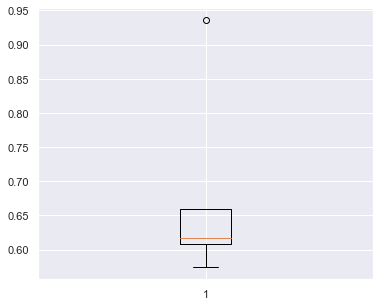

In [250]:
# Let's evaluate the model performance by using KFold and cross_val_score
# K-Folds cross-validator provides dataset indices to split data into train/validation sets. 
# Split dataset into k consecutive stratified folds (without shuffling by default).
#Each fold is then used once as validation while the k - 1 remaining folds form the training set.

scorer='recall'

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=sgd_gridsearch, X=X_train, y=y_train, scoring=scorer, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(6,5))
plt.boxplot(cv_result_bfr)
plt.show()

- Performance of the model varies between 0.58 to 0.94.

Accuracy on training set :  0.7192086790044672
Accuracy on test set :  0.75
Recall on training set :  0.5982905982905983
Recall on test set :  0.69
Precision on training set :  0.2880658436213992
Precision on test set :  0.33495145631067963
f1 on training set :  0.38888888888888895
f1 on test set :  0.45098039215686275


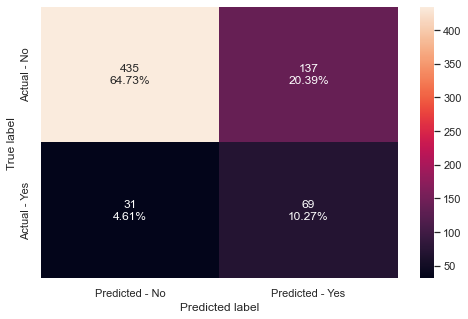

In [251]:
# Calculating different metrics
sgb_gridsearch_score=get_metrics_score(sgd_gridsearch)

# Creating confusion matrix
make_confusion_matrix(sgd_gridsearch, y_test)

- Accuracy is at 71%, recall training is higher than test.  Low precision and F1 score.

#### SVM Grid Search

In [252]:
import time
start_base = time.time() # to check execution time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), svm.SVC(random_state=42, class_weight='balanced', probability=True))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "svc__C": [ 1, 10, 100],
    "svc__gamma": [0.001, 0.0001]
    #"svc__C": [0.1, 1, 10, 100, 1000],
    #"svc__kernel": ['rbf','poly','linear'],
    #"svc__gamma": [1, 0.1, 0.01, 0.001, 0.0001]
}
 
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=10, n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

end_base = time.time()
execution_time = exec_time(start_base, end_base)

print("SVM GridSearch execution time is {a}".format(a=execution_time))
print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

SVM GridSearch execution time is 0:0:12
Best Parameters:{'svc__C': 100, 'svc__gamma': 0.001} 
Score: 0.7817028985507246


In [253]:
# Creating new pipeline with best parameters
svm_gridsearch = make_pipeline(StandardScaler(),
                                         svm.SVC(random_state=42, class_weight='balanced', probability=True,
                                            C=100, gamma=0.001))
# Fit the model on training data
svm_gridsearch.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=100, class_weight='balanced', gamma=0.001,
                     probability=True, random_state=42))])

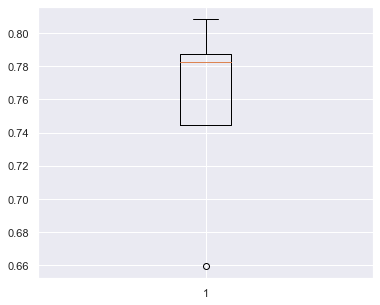

In [254]:
# Let's evaluate the model performance by using KFold and cross_val_score
# K-Folds cross-validator provides dataset indices to split data into train/validation sets. 
# Split dataset into k consecutive stratified folds (without shuffling by default).
#Each fold is then used once as validation while the k - 1 remaining folds form the training set.
scorer='recall'

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=svm_gridsearch, X=X_train, y=y_train, scoring=scorer, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(6,5))
plt.boxplot(cv_result_bfr)
plt.show()

- Performance of the model varies between 0.66 to 0.81.

Accuracy on training set :  0.7945118059987237
Accuracy on test set :  0.7916666666666666
Recall on training set :  0.8888888888888888
Recall on test set :  0.87
Precision on training set :  0.4126984126984127
Precision on test set :  0.40654205607476634
f1 on training set :  0.5636856368563686
f1 on test set :  0.554140127388535


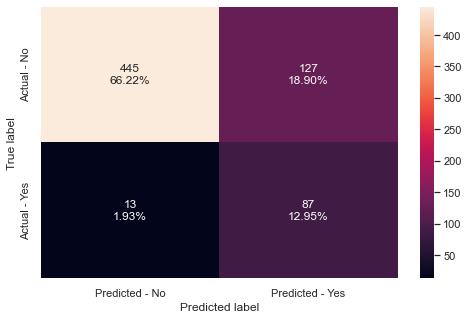

In [255]:
# Calculating different metrics
svm_gridsearch_score=get_metrics_score(svm_gridsearch)

# Creating confusion matrix
make_confusion_matrix(svm_gridsearch, y_test)

- Good model performance, accuracy is at 80%, recall is at 88%. Good improvement in Precision and F1 score.

#### Ridge Classifier Grid Search

In [310]:
import time
start_base = time.time() # to check execution time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), RidgeClassifier(random_state=42, class_weight='balanced', max_iter=1000))

# Parameter grid to pass in GridSearchCV
param_grid = {
    "ridgeclassifier__alpha": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "ridgeclassifier__solver": ['auto', 'lsqr', 'sparse_cg','saga','lbfgs']

}
 
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=10, n_jobs=-1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

end_base = time.time()
execution_time = exec_time(start_base, end_base)

print("Ridge GridSearch execution time is {a}".format(a=execution_time))
print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Ridge GridSearch execution time is 0:0:14
Best Parameters:{'ridgeclassifier__alpha': 0.1, 'ridgeclassifier__solver': 'auto'} 
Score: 0.7601449275362319


In [257]:
# Creating new pipeline with best parameters
ridge_gridsearch = make_pipeline(StandardScaler(),
                                         RidgeClassifier(random_state=42, class_weight='balanced', alpha=0.1, solver='lsqr', probability=True))
# Fit the model on training data
ridge_gridsearch.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgeclassifier',
                 RidgeClassifier(alpha=0.1, class_weight='balanced',
                                 random_state=42, solver='lsqr'))])

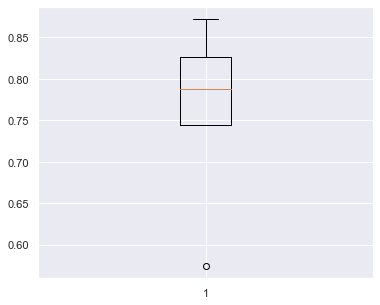

In [258]:
# Let's evaluate the model performance by using KFold and cross_val_score
# K-Folds cross-validator provides dataset indices to split data into train/validation sets. 
# Split dataset into k consecutive stratified folds (without shuffling by default).
#Each fold is then used once as validation while the k - 1 remaining folds form the training set.
scorer='recall'

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=ridge_gridsearch, X=X_train, y=y_train, scoring=scorer, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(6,5))
plt.boxplot(cv_result_bfr)
plt.show()

- Performance of the model variels between 0.59 to 0.85.

Accuracy on training set :  0.774728781110402
Accuracy on test set :  0.7916666666666666
Recall on training set :  0.8290598290598291
Recall on test set :  0.87
Precision on training set :  0.3826429980276134
Precision on test set :  0.40654205607476634
f1 on training set :  0.5236167341430499
f1 on test set :  0.554140127388535


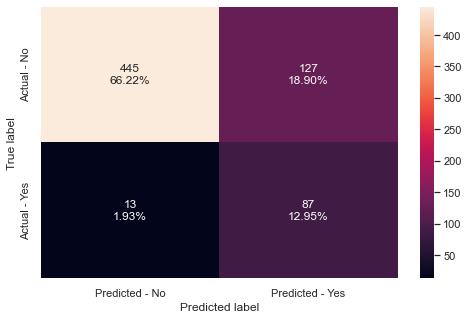

In [259]:
# Calculating different metrics
ridge_gridsearch_score=get_metrics_score(ridge_gridsearch)

# Creating confusion matrix
make_confusion_matrix(ridge_gridsearch, y_test)

- Performance of the model dropped comparing to previous model.

#### Logistic Regression Grid Search

In [260]:
import time
start_base = time.time() # to check execution time

# Creating pipeline
pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))

param_grid = {'logisticregression__penalty': ['l1', 'l2','elasticnet'], 
              "logisticregression__solver":['newton-cg','saga','liblinear','lbfgs'],  
              'logisticregression__C' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=10, n_jobs=-1)

# Fitting parameters in GridSeachCV

grid_cv.fit(X_train, y_train)

end_base = time.time()
execution_time = exec_time(start_base, end_base)

print("Ridge GridSearch execution time is {a}".format(a=execution_time))
print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

Ridge GridSearch execution time is 0:0:8
Best Parameters:{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1', 'logisticregression__solver': 'liblinear'} 
Score: 0.8121376811594203


In [261]:
# Creating new pipeline with best parameters
lg_gridsearch = make_pipeline(StandardScaler(),
                                         LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced', C=0.01, penalty='l1',
                                                            solver='liblinear'))
# Fit the model on training data
lg_gridsearch.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    max_iter=1000, penalty='l1',
                                    random_state=42, solver='liblinear'))])

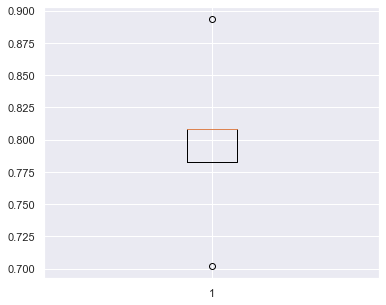

In [262]:
# Let's evaluate the model performance by using KFold and cross_val_score
# K-Folds cross-validator provides dataset indices to split data into train/validation sets. 
# Split dataset into k consecutive stratified folds (without shuffling by default).
#Each fold is then used once as validation while the k - 1 remaining folds form the training set.

scorer='recall'

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=lg_gridsearch, X=X_train, y=y_train, scoring=scorer, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(6,5))
plt.boxplot(cv_result_bfr)
plt.show()

- Performance of the model varies between 0.70 to 0.90

Accuracy on training set :  0.6279514996809189
Accuracy on test set :  0.6666666666666666
Recall on training set :  0.8632478632478633
Recall on test set :  0.86
Precision on training set :  0.2682602921646746
Precision on test set :  0.2905405405405405
f1 on training set :  0.4093211752786221
f1 on test set :  0.4343434343434343


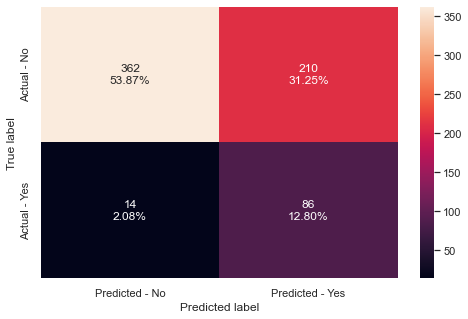

In [263]:
# Calculating different metrics
lg_gridsearch_score=get_metrics_score(lg_gridsearch)

# Creating confusion matrix
make_confusion_matrix(lg_gridsearch, y_test)

In [287]:
import time
start_base = time.time() # to check execution time

#Creating pipeline
pipe=make_pipeline(StandardScaler(), XGBClassifier(random_state=42, eval_metric='logloss'))

#Parameter grid to pass in GridSearchCV
param_grid={'xgbclassifier__n_estimators':np.arange(50, 300, 50),
            'xgbclassifier__scale_pos_weight':[0, 1, 2, 5, 10],
            'xgbclassifier__learning_rate':[0.01, 0.1, 0.2, 0.05],
            'xgbclassifier__gamma':[0, 1, 3, 5],
            'xgbclassifier__subsample':[0.7, 0.8, 0.9, 1]}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling GridSearchCV
grid_cv = GridSearchCV(estimator=pipe, param_grid=param_grid, scoring=scorer, cv=5)

#Fitting parameters in GridSeachCV
grid_cv.fit(X_train,y_train)

end_base = time.time()
execution_time = exec_time(start_base, end_base)

print("XGBoost GridSearch execution time is {a}".format(a=execution_time))
print("Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_))

XGBoost GridSearch execution time is 0:31:3
Best Parameters:{'xgbclassifier__gamma': 5, 'xgbclassifier__learning_rate': 0.01, 'xgbclassifier__n_estimators': 50, 'xgbclassifier__scale_pos_weight': 10, 'xgbclassifier__subsample': 0.7} 
Score: 0.7436632747456059


In [322]:
# Creating new pipeline with best parameters
xgb_gridsearch = make_pipeline(StandardScaler(),
                                         XGBClassifier(random_state=42,gamma=5, learning_rate =0.001, n_estimators=300, scale_pos_weight=10,subsample=0.8, eval_metric='logloss'))
# Fit the model on training data
xgb_gridsearch.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, eval_metric='logloss',
                               gamma=5, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.001,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=300,
                               n_jobs=8, num_parallel_tree=1, random_state=42,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=10,
                               subsample=0.8, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

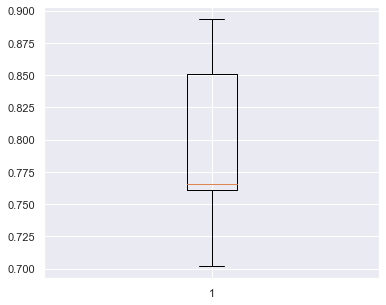

In [323]:
# Let's evaluate the model performance by using KFold and cross_val_score
# K-Folds cross-validator provides dataset indices to split data into train/validation sets. 
# Split dataset into k consecutive stratified folds (without shuffling by default).
#Each fold is then used once as validation while the k - 1 remaining folds form the training set.

scorer='recall'

kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)     #Setting number of splits equal to 5
cv_result_bfr=cross_val_score(estimator=xgb_gridsearch, X=X_train, y=y_train, scoring=scorer, cv=kfold)
#Plotting boxplots for CV scores of model defined above
plt.figure(figsize=(6,5))
plt.boxplot(cv_result_bfr)
plt.show()

- Performance of the model varies between 0.675 to 0.850.

Accuracy on training set :  0.811104020421187
Accuracy on test set :  0.7901785714285714
Recall on training set :  0.9914529914529915
Recall on test set :  0.85
Precision on training set :  0.44106463878326996
Precision on test set :  0.4028436018957346
f1 on training set :  0.6105263157894737
f1 on test set :  0.5466237942122187


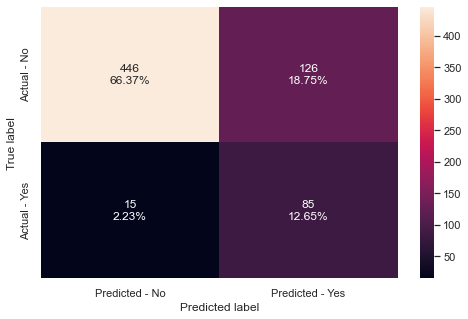

In [324]:
# Calculating different metrics
xgb_gridsearch_score=get_metrics_score(xgb_gridsearch)

# Creating confusion matrix
make_confusion_matrix(xgb_gridsearch, y_test)

- XGBoost produced good model score. However, Recall training score and test score having higher disparity.

### Compare Model Performance

In [316]:
# defining list of models
models = [sgd_gridsearch, svm_gridsearch, ridge_gridsearch, lg_gridsearch, xgb_gridsearch ]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = []
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:

    j = get_metrics_score(model, False) # False is used to supress the output of all the model scores.
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [317]:
comparison_frame = pd.DataFrame(
    {
        "Model": [
            'Stochastic Gradient Descent GridSearch', 'SVM GridSearch', 'Ridge GridSearch', 'LG GridSearch', 'XGB Grid Search'],
        "Train_Accuracy": acc_train,
        "Test_Accuracy": acc_test,
        "Train_Recall": recall_train,
        "Test_Recall": recall_test,
        "Train_Precision": precision_train,
        "Test_Precision": precision_test,
        "Train_F1": f1_train,
        "Test_F1": f1_test
    }
)

In [318]:
# Sorting models with highest test recall.
comparison_frame.sort_values(by="Test_Recall", ascending=False)

Model  Train_Accuracy  Test_Accuracy  \
1                          SVM GridSearch            0.79           0.79   
2                        Ridge GridSearch            0.77           0.79   
3                           LG GridSearch            0.63           0.67   
4                         XGB Grid Search            0.80           0.79   
0  Stochastic Gradient Descent GridSearch            0.72           0.75   

   Train_Recall  Test_Recall  Train_Precision  Test_Precision  Train_F1  \
1          0.89         0.87             0.41            0.41      0.56   
2          0.83         0.87             0.38            0.41      0.52   
3          0.86         0.86             0.27            0.29      0.41   
4          0.99         0.86             0.43            0.40      0.60   
0          0.60         0.69             0.29            0.33      0.39   

   Test_F1  
1     0.55  
2     0.55  
3     0.43  
4     0.54  
0     0.45

- From the above table we can observe that SVM Grid search produced highest recall test score.

### Model Evaluation

In [200]:
# final model SVM evaluation.
import lime
from lime import lime_tabular

lime_explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['Dont accept','Accept'],
    mode='classification'
)

In [326]:
# below code separates a single instance from the test set.
# we use below record to see how the model explains
test_1 = X_test.iloc[1]
test_1

Income                   50501.00
Kidhome                      1.00
Teenhome                     1.00
Recency                     10.00
MntWines                   297.00
MntFruits                    0.00
MntMeatProducts             38.00
MntFishProducts             13.00
MntSweetProducts             0.00
MntGoldProds               152.00
NumDealsPurchases            7.00
NumWebPurchases              5.00
NumCatalogPurchases          4.00
NumStorePurchases            4.00
NumWebVisitsMonth            6.00
Complain                     0.00
cust_age                    67.00
Reg_year                  2013.00
Reg_month                    6.00
Reg_week                     2.00
Education_Graduation         1.00
Education_Master             0.00
Education_PhD                0.00
Marital_Status_Married       1.00
Marital_Status_Single        0.00
Marital_Status_Widow         0.00
Name: 2198, dtype: float64

In [204]:
lime_exp = lime_explainer.explain_instance(data_row= test_1, predict_fn=svm_gridsearch.predict_proba)
lime_exp.show_in_notebook(show_table=True)

- For the above record the model is almost certain this is a bad campaign (97% chance). Take a look at Education PhD, Marital Status, Education Master and NumCatalogPurchase,  increase in these will decrease customer not accepting the offer from the campaign.
- Similarly increase in Reg_year, Teenhome, EducationGraudation, Complain, MaritalStatus widow, MntGoldProds will increase the chances of customer accepting the offer from the campaign.

In [205]:
lime_exp.predict_proba

array([0.96589924, 0.03410076])

- For the above record, model predicted that customer will not accept the offer from the campaign by 96%.

In [237]:
# check for any customer who accepted the offer, so that we can test it against the model.
y_test[:20]

1396   0.00
522    0.00
1966   0.00
282    0.00
1186   0.00
767    0.00
1531   0.00
812    0.00
7      0.00
2218   0.00
585    0.00
1843   0.00
1077   0.00
692    0.00
1779   0.00
248    0.00
1681   0.00
703    1.00
860    0.00
353    0.00
Name: Response, dtype: float64

- As we see from the above that index location of 17 has accepted the offer from the last campaign.
- Lets analyze what is the probability that this customer will accept the offer from the campaign

In [240]:
# lets check individual records of a customer.

exp = explainer.explain_instance(
    data_row=X_test.iloc[17], 
    predict_fn=svm_gridsearch.predict_proba
)

exp.show_in_notebook(show_table=True)

- As we see that the model predicted that this customer will accept the offer by 34%. Increasae in Education Phd, Reg_year and NumWebVistis month will decrease the chances of **THIS** customer rejecting the offer.
- Similarly increase in Marital Status married, Teenhome, Education Master, Complain and MntMeatProducts and income will incrase the chances of **THIS** customer accepting the offer

**Best model confusion matrix interpretation**

In [309]:
# Positive and Negative rate confusion matrix of the best model SVM
hardpredtst=svm_gridsearch.predict(X_test)
def conf_matrix(y_test,pred):
    ((tp, fp), (fn, tn)) = metrics.confusion_matrix(y_test, pred)
    ((tpr,fpr),(fnr,tnr))= metrics.confusion_matrix(y_test, pred, 
            normalize='true')
    return pd.DataFrame([[f'TP = {tp} (TPR = {tpr:1.2%})', 
                                f'FP = {fp} (FPR = {fpr:1.2%})'], 
                         [f'FN = {fn} (FNR = {fnr:1.2%})', 
                                f'TN = {tn} (TNR = {tnr:1.2%})']],
            index=['True 0(Customer will not buy)', 'True 1(Customer will buy)'], 
            columns=['Pred 0(Approve as customer will buy)', 
                            'Pred 1(Deny as customer will buy)'])
conf_matrix(y_test,hardpredtst)

Pred 0(Approve as customer will buy)  \
True 0(Customer will not buy)              TP = 445 (TPR = 77.80%)   
True 1(Customer will buy)                   FN = 13 (FNR = 13.00%)   

                              Pred 1(Deny as customer will buy)  
True 0(Customer will not buy)           FP = 127 (FPR = 22.20%)  
True 1(Customer will buy)                TN = 87 (TNR = 87.00%)

- 445 (True Positive) of the customers we predicted they will not buy, and they did not buy.
- 127 (False Positive) of the customers we predicted they will buy, but they did not buy.
- 13 (False Negative) of the customers we predicted they will not buy, but they did buy.
- 87 (True Positive) of the customers we predicted they will buy and they did buy

# Business Recommendations:

- Company should target customers who buy premium products - gold products or high quality wines - as these customers are able to spend more and are more likely to purchase the offer. We can further launch premium offers for such customers.
- We observed in our analysis that ~64% of customers are married but single customers, including divorced and widowed, are more equally or more likely to take the offer. Company should expand their customers by customizing offers to attract more single customers.
- Customers who are frequent buyers, should be targeted more by the company and offer them added benefits.
- Total amount spent has decreased over the years which shows that either our product qualities has declined or company lacks marketing strategies. Company should constantly improve their marketing strategies to address such issues.
- Our analysis showed that ~99% customers had no complaints in the last two years which can be due to the lack of feedback options for customers. Company should create easy mechanisms to gather feedback from the customers and use it to identify major concerns, if any.
- The number of web visits is an important feature and company should work on customizing their website to allow more traffic on the website. We can improve the interface and provide easy check-in, check-out and delivery options.